# Data Extraction

Notes:
1. The code assumes that the order of the columns remain the same i.e., columns n:n are items from the Updated Dogmatism Scale and they remain in the same order
2. The code assumes that other than the demo questionnaires, everything else requires an answer and the answer format has not changed - please notify if else
3. Code has not yet accounted for 'other' answers under the sex, gender, diagnoses, and stimulants section - need to discusss to streamline the output
4. Readability and flexibility is prioritised (or attempting to), if there are any parts that are unreadable or is difficult to troubleshoot due to foreseeable issues, please lmk
5. Because of the way Jupyter works, if you've run a column and go back and run previous columns, the output may not be correct and/or an error may pop up - I've tried reducing the occurence as much as possible but the safest option is to re-run the code from the respective header/section 

---

# Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, date, timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#os.chdir('/Users/paveenamnuaisuk/Downloads')

os.chdir('/home/pavgreen/Documents/Amodio')

dforig = pd.read_csv('EEGMANYLABS_Responses - Form responses 1.csv')
dforig

Timestamp  Please enter your participant number  \
0   04/07/2023 10:16:13                                  9001   
1   04/07/2023 12:01:52                                  9002   
2   04/07/2023 12:53:18                                  9003   
3   04/07/2023 14:39:16                                  9004   
4   04/07/2023 14:30:17                                  9005   
5   05/07/2023 10:29:07                                  9006   
6   05/07/2023 12:36:44                                  9007   
7   05/07/2023 14:15:52                                  9008   
8   05/07/2023 16:19:37                                  9009   
9   06/07/2023 14:35:34                                  9010   
10  06/07/2023 15:23:37                                  9011   
11  06/07/2023 16:30:00                                  9012   
12  07/07/2023 10:22:36                                  9013   
13  07/07/2023 12:41:53                                  9014   
14  10/07/2023 10:49:22                                  9015   
15  10/07/2023 11:56:02                                  9016   
16  10/07/2023 12:49:34                                  9017   
17  10/07/2023 13:52:27                                  9018   
18  11/07/2023 10:16:12                                  9019   
19  11/07/2023 12:03:30                                  9020   
20  11/07/2023 12:59:25                                  9021   
21  11/07/2023 16:33:09                                  9022   
22  11/07/2023 14:54:54                                  9023   
23  11/07/2023 14:13:43                                  9024   
24  11/07/2023 13:51:12                                  9025   
25  14/07/2023 13:58:28                                  9026   
26  14/07/2023 16:09:25                                  9027   
27  14/07/2023 17:20:29                                  9028   
28  15/07/2023 12:45:03                                  9029   
29  15/07/2023 15:30:44                                  9030   
30  15/07/2023 16:24:47                                  9031   
31  17/07/2023 10:53:00                                  9032   
32  17/07/2023 11:53:37                                  9033   
33  17/07/2023 12:55:04                                  9034   
34  17/07/2023 14:10:34                                  9035   
35  18/07/2023 11:46:41                                  9036   
36  18/07/2023 12:54:19                                  9037   
37  18/07/2023 13:23:31                                  9038   
38  18/07/2023 14:40:25                                  9039   
39  19/07/2023 10:43:48                                  9040   
40  06/07/2023 14:32:48                                  9041   
41  19/07/2023 12:27:54                                  9050   
42  19/07/2023 13:44:13                                  9051   
43  19/07/2023 14:15:46                                  9052   
44  24/07/2023 10:18:07                                  9053   
45  24/07/2023 13:57:55                                  9054   
46  24/07/2023 15:38:57                                  9055   
47  24/07/2023 16:39:33                                  9056   
48  28/07/2023 13:50:08                                  9057   

   When is your date of birth? Which sex were you assigned at birth?  \
0                   29/05/2000                                  Male   
1                   29/09/2001                                  Male   
2                   28/10/2000                                Female   
3                   27/10/2000                                  Male   
4                   28/05/2001                                Female   
5                   18/03/2003                                Female   
6                   24/04/2003                                Female   
7                   19/09/2001                                Female   
8                   22/06/2002                                Female   
9                   28/07/2003             

In [3]:
dfmind = pd.read_csv('Mindfulness Response - Form responses 1.csv')
dfmind

Timestamp  Please enter your participant number  \
0   04/07/2023 11:05:56                                  9001   
1   04/07/2023 13:02:20                                  9002   
2   04/07/2023 13:53:11                                  9003   
3   04/07/2023 16:21:16                                  9004   
4   04/07/2023 15:37:42                                  9005   
5   05/07/2023 11:20:26                                  9006   
6   05/07/2023 13:21:18                                  9007   
7   05/07/2023 15:25:01                                  9008   
8   05/07/2023 17:12:50                                  9009   
9   06/07/2023 15:20:48                                  9010   
10  06/07/2023 16:13:47                                  9011   
11  06/07/2023 17:16:11                                  9012   
12  07/07/2023 11:12:35                                  9013   
13  07/07/2023 13:45:02                                  9014   
14  10/07/2023 11:46:15                                  9015   
15  10/07/2023 13:04:37                                  9016   
16  10/07/2023 13:56:04                                  9017   
17  10/07/2023 14:48:49                                  9018   
18  11/07/2023 11:32:11                                  9019   
19  11/07/2023 12:57:53                                  9020   
20  11/07/2023 14:18:42                                  9021   
21  11/07/2023 17:31:52                                  9022   
22  11/07/2023 16:38:02                                  9023   
23  11/07/2023 15:47:55                                  9024   
24  14/07/2023 15:07:09                                  9026   
25  14/07/2023 17:15:40                                  9027   
26  14/07/2023 18:08:34                                  9028   
27  15/07/2023 13:45:43                                  9029   
28  06/07/2023 13:03:40                                  9041   
29  15/07/2023 16:25:43                                  9030   
30  15/07/2023 17:28:43                                  9031   
31  17/07/2023 11:45:49                                  9032   
32  17/07/2023 12:57:20                                  9033   
33  17/07/2023 13:50:00                                  9034   
34  17/07/2023 15:18:04                                  9035   
35  18/07/2023 12:39:25                                  9036   
36  18/07/2023 13:58:02                                  9037   
37  18/07/2023 14:54:12                                  9038   
38  18/07/2023 16:03:57                                  9039   
39  19/07/2023 11:33:26                                  9040   
40  19/07/2023 13:27:37                                  9050   
41  19/07/2023 14:39:06                                  9051   
42  19/07/2023 15:26:41                                  9052   
43  24/07/2023 11:16:04                                  9053   
44  24/07/2023 14:46:41                                  9054   
45  24/07/2023 16:49:50                                  9055   
46  24/07/2023 17:40:13                                  9056   
47  28/07/2023 14:45:04                                  9057   

   Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing]  \
0                                        Always Right                                                                         
1                                        Always Right                                                                         
2                                        Always Right                                                                         
3                                        Always Right                                                                         
4                                        Always Right                                                                         
5                                       Usually Right             

In [4]:
dforig = dforig.merge(dfmind, on = "Please enter your participant number")
dforig

Timestamp_x  Please enter your participant number  \
0   04/07/2023 10:16:13                                  9001   
1   04/07/2023 12:01:52                                  9002   
2   04/07/2023 12:53:18                                  9003   
3   04/07/2023 14:39:16                                  9004   
4   04/07/2023 14:30:17                                  9005   
5   05/07/2023 10:29:07                                  9006   
6   05/07/2023 12:36:44                                  9007   
7   05/07/2023 14:15:52                                  9008   
8   05/07/2023 16:19:37                                  9009   
9   06/07/2023 14:35:34                                  9010   
10  06/07/2023 15:23:37                                  9011   
11  06/07/2023 16:30:00                                  9012   
12  07/07/2023 10:22:36                                  9013   
13  07/07/2023 12:41:53                                  9014   
14  10/07/2023 10:49:22                                  9015   
15  10/07/2023 11:56:02                                  9016   
16  10/07/2023 12:49:34                                  9017   
17  10/07/2023 13:52:27                                  9018   
18  11/07/2023 10:16:12                                  9019   
19  11/07/2023 12:03:30                                  9020   
20  11/07/2023 12:59:25                                  9021   
21  11/07/2023 16:33:09                                  9022   
22  11/07/2023 14:54:54                                  9023   
23  11/07/2023 14:13:43                                  9024   
24  14/07/2023 13:58:28                                  9026   
25  14/07/2023 16:09:25                                  9027   
26  14/07/2023 17:20:29                                  9028   
27  15/07/2023 12:45:03                                  9029   
28  15/07/2023 15:30:44                                  9030   
29  15/07/2023 16:24:47                                  9031   
30  17/07/2023 10:53:00                                  9032   
31  17/07/2023 11:53:37                                  9033   
32  17/07/2023 12:55:04                                  9034   
33  17/07/2023 14:10:34                                  9035   
34  18/07/2023 11:46:41                                  9036   
35  18/07/2023 12:54:19                                  9037   
36  18/07/2023 13:23:31                                  9038   
37  18/07/2023 14:40:25                                  9039   
38  19/07/2023 10:43:48                                  9040   
39  06/07/2023 14:32:48                                  9041   
40  19/07/2023 12:27:54                                  9050   
41  19/07/2023 13:44:13                                  9051   
42  19/07/2023 14:15:46                                  9052   
43  24/07/2023 10:18:07                                  9053   
44  24/07/2023 13:57:55                                  9054   
45  24/07/2023 15:38:57                                  9055   
46  24/07/2023 16:39:33                                  9056   
47  28/07/2023 13:50:08                                  9057   

   When is your date of birth? Which sex were you assigned at birth?  \
0                   29/05/2000                                  Male   
1                   29/09/2001                                  Male   
2                   28/10/2000                                Female   
3                   27/10/2000                                  Male   
4                   28/05/2001                                Female   
5                   18/03/2003                                Female   
6                   24/04/2003                                Female   
7                   19/09/2001                                Female   
8                   22/06/2002                                Female   
9                   28/07/2003                                Female   
10                  21/03/2001    

In [5]:
## Remove rows 

## Remove all
dforig = dforig[~(dforig.iloc[:, 1].isin([9010, 9025, 9035, 9057]))]

## Remove only political
dforig.iloc[dforig.iloc[:, 1] == 9041, 8:154] = np.nan

dforig.sort_values(by = dforig.columns[1], inplace = True)
dforig.reset_index(drop = True, inplace = True)

/tmp/ipykernel_6965/1282027883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dforig.sort_values(by = dforig.columns[1], inplace = True)


---

## Functions

### All of these functions assumes numpy array | Tried class methods but too messy, may reconsider

#### Sum Whole Array

In [6]:
def swa(na):
    return np.round(np.nansum(na),3)

#### Sum Columns

In [7]:
def sc(na):
    return np.round(np.nansum(na, axis=0),3)

#### Sum Rows

In [8]:
def sr(na):
    return np.round(np.nansum(na, axis=1),3)

#### Mean Whole Array

In [9]:
def mwa(na):
    return np.round(np.nanmean(na), 3)

#### Mean Columns

In [10]:
def mc(na):
    return np.round(np.nanmean(na, axis=0), 3)

#### Mean Rows

In [11]:
def mr(na):
    return np.round(np.nanmean(na, axis=1), 3)

#### SD Whole Array

In [12]:
def sdwa(na):
    return np.round(np.nanstd(na), 3)

#### SD Columns

In [13]:
def sdc(na):
    return np.round(np.nanstd(na, axis=0), 3)

#### SD Rows

In [14]:
def sdr(na):
    return np.round(np.nanstd(na, axis=1), 3)

---

## Age, Sex, and Gender

### Sex and Gender

In [15]:
dfasg = dforig.iloc[:, 2:5]
dfasg

When is your date of birth? Which sex were you assigned at birth?  \
0                   29/05/2000                                  Male   
1                   29/09/2001                                  Male   
2                   28/10/2000                                Female   
3                   27/10/2000                                  Male   
4                   28/05/2001                                Female   
5                   18/03/2003                                Female   
6                   24/04/2003                                Female   
7                   19/09/2001                                Female   
8                   22/06/2002                                Female   
9                   21/03/2001                                  Male   
10                  17/09/2003                                  Male   
11                  09/05/2000                                  Male   
12                  20/05/2003                                Female   
13                  23/10/2000                                Female   
14                  07/01/2003                                Female   
15                  18/04/2003                                Female   
16                  19/07/2003                                Female   
17                  25/01/2000                                Female   
18                  21/08/2003                                Female   
19                  09/01/2003                                Female   
20                  16/05/2003                                Female   
21                  13/10/2004                                  Male   
22                  28/09/2003                                Female   
23                  20/08/2004                                  Male   
24                  07/04/2005                                Female   
25                  05/06/2001                                  Male   
26                  12/11/2003                                Female   
27                  22/11/2000                                Female   
28                  17/04/1999                                Female   
29                  21/09/2002                                Female   
30                  06/07/2002                                Female   
31                  19/09/2002                                  Male   
32                  27/07/2001                                  Male   
33                  27/11/2000                                Female   
34                  10/11/2000                                Female   
35                  04/10/2003                                Female   
36                  06/06/2002                                  Male   
37                  16/07/1998                                  Male   
38                  11/07/1998                                  Male   
39                  26/01/2000                                  Male   
40                  19/10/2000                                Female   
41                  28/04/2002                                Female   
42                  30/11/2003                                Female   
43                  26/02/2003                                Female   
44                  07/10/2004                                Female   

   What is your gender?  
0                  Male  
1                  Male  
2                Female  
3                  Male  
4                Female  
5                Female  
6                Female  
7                Female  
8                Female  
9                  Male  
10                 Male  
11                 Male  
12               Female  
13               Female  
14               Female  
15               Female  
16               Female  
17               Female  
18               Female  
19               Female  
20               Female  
21                 Male  
22               Female  
23                 Male  
24               Female  
25            

#### Count

In [16]:
dfc = dfasg.groupby(dfasg.columns[1:3].tolist()).size()
dfc

Which sex were you assigned at birth?  What is your gender?
Female                                 Female                  30
Male                                   Male                    15
dtype: int64

<Axes: title={'center': 'Sex and Gender'}, xlabel='Sex and Gender', ylabel='Number'>

(array([0, 1]), [Text(0, 0, '(Female, Female)'), Text(1, 0, '(Male, Male)')])

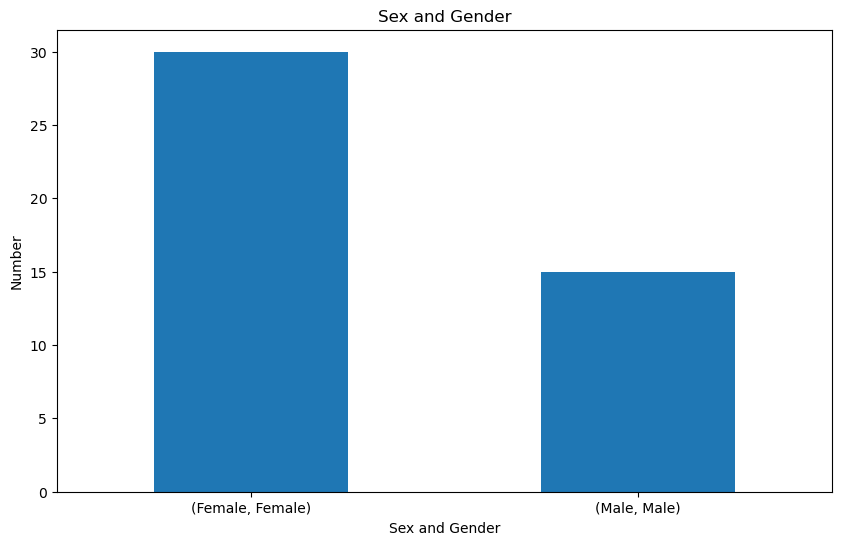

In [17]:
dfc.plot(kind='bar', title='Sex and Gender', ylabel='Number', xlabel='Sex and Gender', figsize=(10, 6))
plt.xticks(rotation=0)

### Age

In [18]:
def ymd(dt):
    bday = datetime.strptime(dt, "%d/%m/%Y").date()
    today = date.today()
    year = timedelta(days=365)
    age = (today-bday)//year
    return(age)

In [19]:
dfasg['Age'] = dfasg.iloc[:, 0].apply(ymd)
dfasg

When is your date of birth? Which sex were you assigned at birth?  \
0                   29/05/2000                                  Male   
1                   29/09/2001                                  Male   
2                   28/10/2000                                Female   
3                   27/10/2000                                  Male   
4                   28/05/2001                                Female   
5                   18/03/2003                                Female   
6                   24/04/2003                                Female   
7                   19/09/2001                                Female   
8                   22/06/2002                                Female   
9                   21/03/2001                                  Male   
10                  17/09/2003                                  Male   
11                  09/05/2000                                  Male   
12                  20/05/2003                                Female   
13                  23/10/2000                                Female   
14                  07/01/2003                                Female   
15                  18/04/2003                                Female   
16                  19/07/2003                                Female   
17                  25/01/2000                                Female   
18                  21/08/2003                                Female   
19                  09/01/2003                                Female   
20                  16/05/2003                                Female   
21                  13/10/2004                                  Male   
22                  28/09/2003                                Female   
23                  20/08/2004                                  Male   
24                  07/04/2005                                Female   
25                  05/06/2001                                  Male   
26                  12/11/2003                                Female   
27                  22/11/2000                                Female   
28                  17/04/1999                                Female   
29                  21/09/2002                                Female   
30                  06/07/2002                                Female   
31                  19/09/2002                                  Male   
32                  27/07/2001                                  Male   
33                  27/11/2000                                Female   
34                  10/11/2000                                Female   
35                  04/10/2003                                Female   
36                  06/06/2002                                  Male   
37                  16/07/1998                                  Male   
38                  11/07/1998                                  Male   
39                  26/01/2000                                  Male   
40                  19/10/2000                                Female   
41                  28/04/2002                                Female   
42                  30/11/2003                                Female   
43                  26/02/2003                                Female   
44                  07/10/2004                                Female   

   What is your gender?  Age  
0                  Male   23  
1                  Male   22  
2                Female   22  
3                  Male   22  
4                Female   22  
5                Female   20  
6                Female   20  
7                Female   22  
8                Female   21  
9                  Male   22  
10                 Male   20  
11                 Male   23  
12               Female   20  
13               Female   22  
14               Female   20  
15               Female   20  
16               Female   20  
17               Female   23  
18               Female   20  
19               Female   20  
20               Female   20  
21      

#### Mean, Standard Deviation

In [20]:
age = np.array(dfasg['Age'])
print(f'Mean: {mwa(age)} | SD: {sdwa(age)}')

Mean: 21.156 | SD: 1.591


<BarContainer object of 2 artists>

Text(0, 0.5, 'Years')

Text(0.5, 1.0, 'Age')

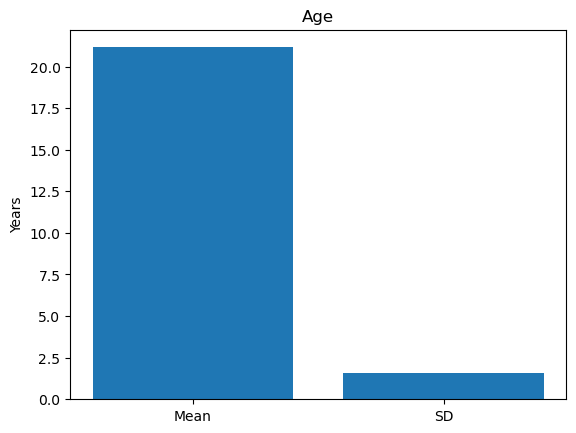

In [21]:
plt.bar(['Mean', 'SD'] , [mwa(age), sdwa(age)])
plt.ylabel('Years')
plt.title('Age')

---

## Nationality and Ethnicity

In [22]:
dfne = dforig.iloc[:, 5:7]
dfne

What is your nationality? What is your race or ethnicity?
0                     Yemeni                            Arab
1                      Egypt                     Middle East
2                   Bruneian                        Chinese 
3                   Bruneian                           Malay
4                  Malaysian                           Malay
5                  Malaysian                         Chinese
6                  Malaysian                         Chinese
7                  Malaysian                         Chinese
8                  Malaysian                         Chinese
9                  Malaysian                         Chinese
10                 Malaysian                         Chinese
11                 Malaysian                         Chinese
12                 Malaysian                         Chinese
13                 Malaysian                         Chinese
14                 Malaysian                         Chinese
15                 Malaysian                         Chinese
16                 Malaysian                         Chinese
17                 Malaysian                        Chinese 
18                 Malaysian                         Chinese
19                 Malaysian                         Chinese
20                 Malaysian                         Chinese
21                 Malaysian                         Chinese
22                 Malaysian                         Chinese
23                 Malaysian                        Chinese 
24                    Indian                          Indian
25                 Malaysian                           Malay
26                 Malaysian                          Indian
27                 Malaysian                         Chinese
28                 Malaysian                         Chinese
29                 Malaysian                         Chinese
30                 Malaysian                         Chinese
31                Malaysian                          Chinese
32                 Pakistani                           Brown
33                Sri Lankan                       Sinhalese
34                 Malaysian                         Indian 
35                 Malaysian                          Indian
36                  Jamaican                           Black
37                 Malaysian                         Chinese
38                Sri Lankan                        Hinduism
39                Sri Lankan                           Tamil
40                 Malaysian                           Malay
41                 Malaysian                         Chinese
42                 Malaysian                         Chinese
43                 Malaysian                        ChIndian
44                 Malaysian                         Chinese

In [23]:
dfne.groupby(dfne.columns.tolist()).size()

What is your nationality?  What is your race or ethnicity?
Bruneian                   Chinese                             1
                           Malay                               1
Egypt                      Middle East                         1
Indian                     Indian                              1
Jamaican                   Black                               1
Malaysian                  ChIndian                            1
                           Chinese                            25
                           Chinese                             2
                           Indian                              2
                           Indian                              1
                           Malay                               3
Malaysian                  Chinese                             1
Pakistani                  Brown                               1
Sri Lankan                 Hinduism                            1
                           Sinh

---

## Education

In [24]:
dfe = dforig.iloc[:, 7:8]
dfe

What is your current education level?
0                          Undergraduate
1                          Undergraduate
2                          Undergraduate
3                          Undergraduate
4                          Undergraduate
5                          Undergraduate
6                          Undergraduate
7                          Undergraduate
8                          Undergraduate
9                          Undergraduate
10                         Undergraduate
11                          Postgraduate
12                         Undergraduate
13                          Postgraduate
14                         Undergraduate
15                         Undergraduate
16                         Undergraduate
17                         Undergraduate
18                         Undergraduate
19                         Undergraduate
20                         Undergraduate
21                         Undergraduate
22                         Undergraduate
23                         Undergraduate
24                         Undergraduate
25                         Undergraduate
26                         Undergraduate
27                         Undergraduate
28                         Undergraduate
29                         Undergraduate
30                         Undergraduate
31                         Undergraduate
32                         Undergraduate
33                         Undergraduate
34                         Undergraduate
35                         Undergraduate
36                         Undergraduate
37                          Postgraduate
38                         Undergraduate
39                         Undergraduate
40                         Undergraduate
41                         Undergraduate
42                         Undergraduate
43                         Undergraduate
44                         Undergraduate

In [25]:
dfc = dfe.groupby(dfe.columns[0]).size()
dfc

What is your current education level?
Postgraduate      3
Undergraduate    42
dtype: int64

<Axes: xlabel='What is your current education level?'>

(array([0, 1]),
 [Text(0, 0, '(Undergraduate,)'), Text(1, 0, '(Postgraduate,)')])

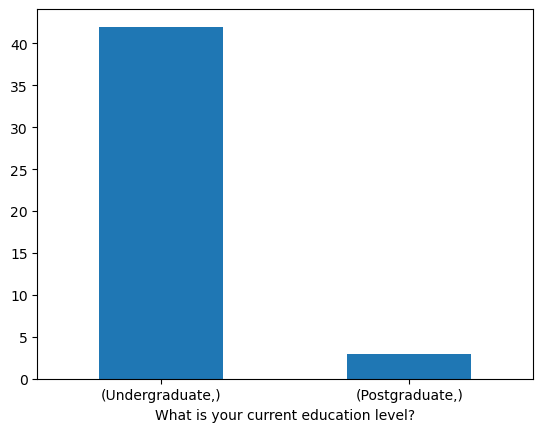

In [26]:
dfe.value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

---

## Handedness

In [27]:
dfh = dforig.iloc[:, 8:9]
dfh

LQ
0    86.67
1    69.23
2    70.00
3    87.50
4   100.00
5    66.67
6    66.67
7    47.36
8   100.00
9    88.20
10   60.00
11  100.00
12   85.70
13  100.00
14   53.80
15  100.00
16   55.56
17   55.50
18  100.00
19  100.00
20  100.00
21  100.00
22   45.50
23   78.90
24   29.40
25   60.00
26   90.00
27  100.00
28   60.00
29   52.90
30   67.00
31   73.30
32   38.46
33  100.00
34   90.90
35   55.56
36  100.00
37     NaN
38   53.80
39  100.00
40   88.00
41   75.00
42   50.00
43   76.00
44  100.00

In [28]:
def handedness(n):
    if n >= 40:
        return "Right handed"
    elif n < 40 and n > -40:
        return "Ambidextrous"
    elif n <= -40:
        return "Left handed"

dfh["LQ"] = dfh["LQ"].apply(handedness)
dfh

LQ
0   Right handed
1   Right handed
2   Right handed
3   Right handed
4   Right handed
5   Right handed
6   Right handed
7   Right handed
8   Right handed
9   Right handed
10  Right handed
11  Right handed
12  Right handed
13  Right handed
14  Right handed
15  Right handed
16  Right handed
17  Right handed
18  Right handed
19  Right handed
20  Right handed
21  Right handed
22  Right handed
23  Right handed
24  Ambidextrous
25  Right handed
26  Right handed
27  Right handed
28  Right handed
29  Right handed
30  Right handed
31  Right handed
32  Ambidextrous
33  Right handed
34  Right handed
35  Right handed
36  Right handed
37          None
38  Right handed
39  Right handed
40  Right handed
41  Right handed
42  Right handed
43  Right handed
44  Right handed

<Axes: xlabel='LQ'>

(array([0, 1]), [Text(0, 0, '(Right handed,)'), Text(1, 0, '(Ambidextrous,)')])

LQ          
Right handed    42
Ambidextrous     2
Name: count, dtype: int64

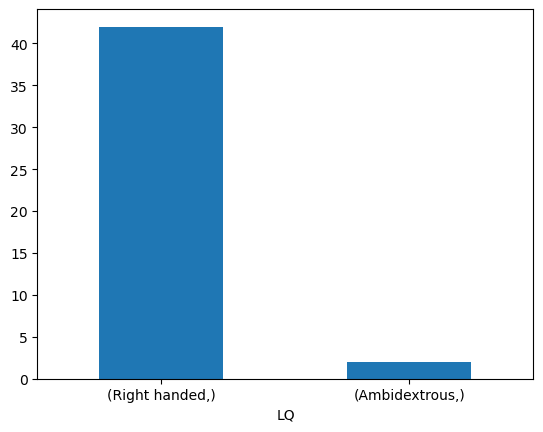

In [29]:
dfh.value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)
dfh.value_counts()

---

## Diagnoses, Medication, and Stimulants

In [30]:
dfdns = dforig.iloc[:, 9:15]
dfdns

Do you have a diagnosis of psychiatric or neurological conditions?  \
0                                                  No                   
1                                                 Yes                   
2                                                  No                   
3                                                  No                   
4                                                  No                   
5                                                  No                   
6                                                  No                   
7                                                  No                   
8                                                  No                   
9                                                  No                   
10                                                 No                   
11                                                 No                   
12                                                 No                   
13                                                 No                   
14                                                 No                   
15                                                 No                   
16                                                 No                   
17                                                Yes                   
18                                                 No                   
19                                                 No                   
20                                                 No                   
21                                                 No                   
22                                                 No                   
23                                                 No                   
24                                                 No                   
25                                                 No                   
26                                                 No                   
27                                                 No                   
28                                                 No                   
29                                                 No                   
30                                                 No                   
31                                                 No                   
32                                                 No                   
33                                                 No                   
34                                                 No                   
35                                                 No                   
36                                                 No                   
37                                                NaN                   
38                                                 No                   
39                                                 No                   
40                                                 No                   
41                                                 No                   
42                                                 No                   
43                                                 No                   
44                                                 No                   

   If you responded 'yes' to the previous question, please indicate the diagnosis received.  \
0                                                 NaN                                         
1                                   ADD/mood disorder                                         
2                                                 NaN                                         
3                                                 NaN                                         
4                                                 NaN                                         
5                                                 NaN                     

### Diagnoses

#### Count in total, Responses if Yes, and Index if Yes

<Axes: xlabel='Do you have a diagnosis of psychiatric or neurological conditions?'>

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

If you responded 'yes' to the previous question, please indicate the diagnosis received.
ADD/mood disorder             1
Major Depressive Disorder     1
-                             1
Name: count, dtype: int64

[1, 17]

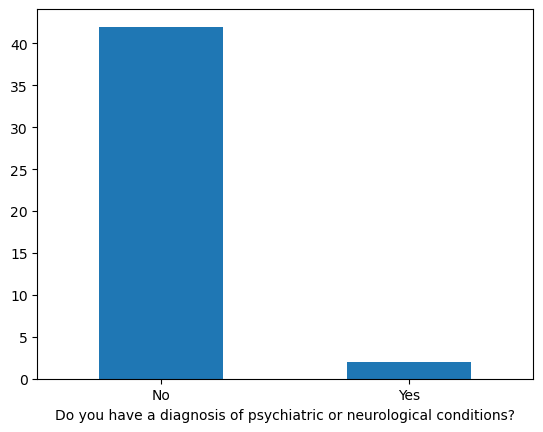

In [31]:
dfdns.iloc[:, 0].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

# Responses if yes
dfdns.iloc[:, 1].value_counts()

# Take note of index if yes 
dfdns.index[dfdns.iloc[:, 0] == 'Yes'].tolist()

## Medication

<Axes: xlabel='Are you currently taking any psychiatric medication? '>

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

If you responded 'yes' to the previous question, please indicate the medication. 
quetapine/lamictal    1
Lexapro               1
-                     1
Name: count, dtype: int64

[1, 4]

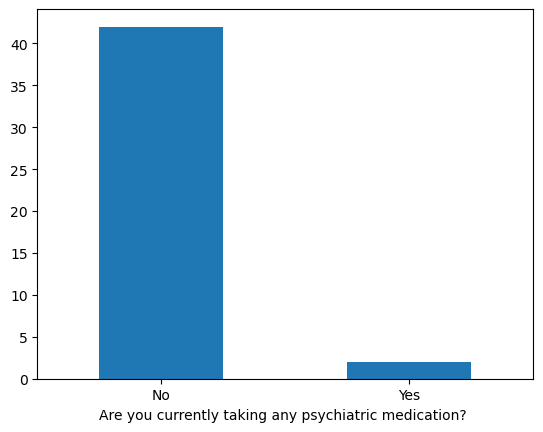

In [32]:
dfdns.iloc[:, 2].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

# Responses if yes
dfdns.iloc[:, 3].value_counts()

# Take note of index if yes 
dfdns.index[dfdns.iloc[:, 2] == 'Yes'].tolist()

### Stimulants

#### Count in total, Responses if Yes, and Index if Yes

<Axes: xlabel='Have you consumed any food, drinks, or medications containing nicotine, caffeine, alcohol or other stimulants in the last 24 hours?'>

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

If you responded 'yes' to the previous question, please write below what you have consumed
coffee                                  2
tea                                     1
Nescafe coffee at 8am                   1
coffee (2 cups)                         1
Cigerretes                              1
High Stim Preworkout (3pm Yesterday)    1
e-cigarette                             1
E-cigarettes                            1
Caffeine                                1
Coffee                                  1
CAFFEINE                                1
1 cup of tea 2 hours prior              1
Matcha iced tea                         1
Vinegar                                 1
Black coffee                            1
a can of coffee                         1
drank coffee                            1
Matcha latte                            1
Lexapro, Coffee                         1
-                                       1
Name: count, dtype: int64

[1, 2, 4, 5, 6, 7, 12, 13, 14, 15, 24, 26, 27, 31, 34, 35, 36, 38, 40, 43]

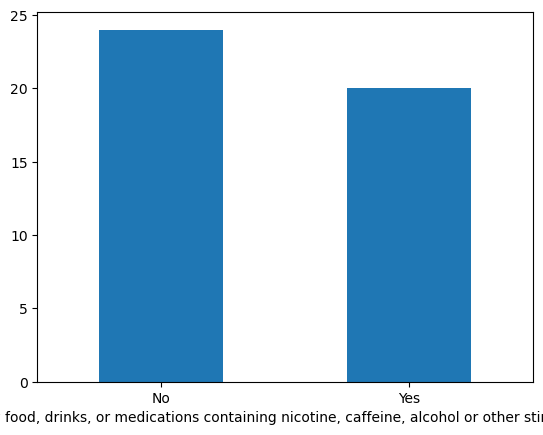

In [33]:
dfdns.iloc[:, 4].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

# Should probably consider the categorisation of common responses i.e., Coffee, Tea)
dfdns.iloc[:, 5].value_counts()

# Take note of index if yes
dfdns.index[dfdns.iloc[:, 4] == 'Yes'].tolist()

---

## One-Item liberalism vs Conservatism Scale

In [34]:
dfolc = dforig.iloc[:, 15]

dfolc

0                         -1
1                         -2
2                         -3
3                          1
4                         -3
5                          0
6                          2
7                         -3
8                          0
9                         -4
10                        -2
11                         0
12                        -3
13                        -4
14                         1
15                         0
16                         0
17                        -2
18                         3
19                         1
20                        -1
21                         1
22                         1
23                         0
24                         0
25                        -2
26                        -4
27                        -2
28                        -4
29                        -3
30    -5 (Extremely Liberal)
31                        -4
32                         0
33                        -4
34            

In [35]:
dolc = {
        '-5 (Extremely Liberal)': -5,
        '5 (Extremely Conservative)': 5
       }

dfolc.replace(dolc, inplace = True)

### Descriptive Statistics

<Axes: xlabel='Instructions: Please indicate your political orientation on the scale below. [Political Orientation]'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '-2'),
  Text(2, 0, '-4'),
  Text(3, 0, '-3'),
  Text(4, 0, '1'),
  Text(5, 0, '-1'),
  Text(6, 0, '2'),
  Text(7, 0, '3'),
  Text(8, 0, '-5')])

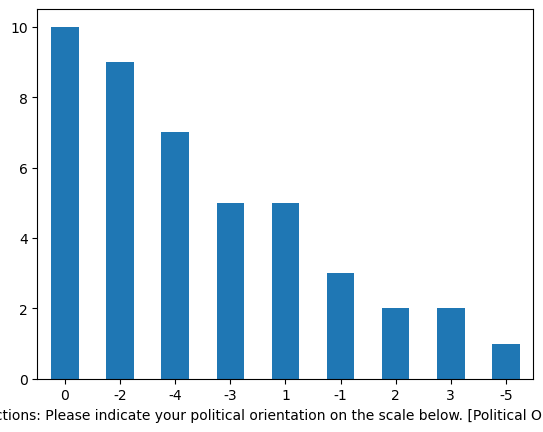

In [36]:
olc = np.array(dfolc, dtype = float)

dfolc.value_counts().plot(kind = 'bar')

plt.xticks(rotation=0)

<BarContainer object of 2 artists>

Mean: -1.227
SD: 2.055


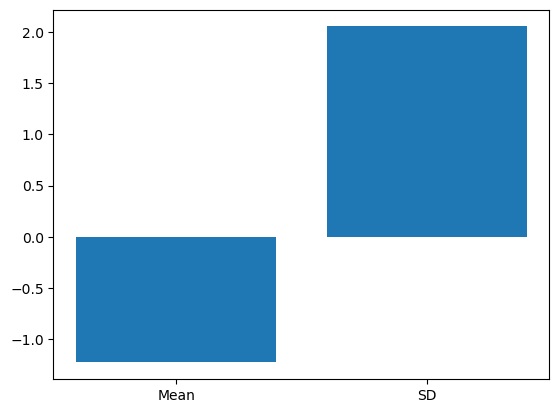

In [37]:
## Mean and Standard Deviation
plt.bar(['Mean', 'SD'], [mwa(olc), sdwa(olc)])

print(f"Mean: {mwa(olc)}")
print(f"SD: {sdwa(olc)}")

---

## Updated Dogmatism Scale

### Original Scores

In [38]:
dfuds = dforig.iloc[:, 16:27]
dfuds

People who disagree with me are usually wrong.  \
0                                              1.0   
1                                              3.0   
2                                              3.0   
3                                              2.0   
4                                              1.0   
5                                              4.0   
6                                              3.0   
7                                              2.0   
8                                              4.0   
9                                              3.0   
10                                             2.0   
11                                             1.0   
12                                             2.0   
13                                             1.0   
14                                             2.0   
15                                             2.0   
16                                             2.0   
17                                             2.0   
18                                             2.0   
19                                             2.0   
20                                             3.0   
21                                             3.0   
22                                             2.0   
23                                             3.0   
24                                             1.0   
25                                             4.0   
26                                             3.0   
27                                             2.0   
28                                             2.0   
29                                             2.0   
30                                             4.0   
31                                             3.0   
32                                             4.0   
33                                             2.0   
34                                             1.0   
35                                             4.0   
36                                             2.0   
37                                             NaN   
38                                             3.0   
39                                             3.0   
40                                             2.0   
41                                             2.0   
42                                             3.0   
43                                             3.0   
44                                             2.0   

     Having multiple perspectives on an issue is usually desirable.  \
0                                                 4.0                 
1                                                 4.0                 
2                                                 3.0                 
3                                                 5.0                 
4                                                 5.0                 
5                                                 4.0                 
6                                                 4.0                 
7                                                 5.0                 
8                                                 4.0                 
9                                                 4.0                 
10                                                5.0                 
11                                                5.0                 
12                                                4.0                 
13                                                5.0                 
14                                                4.0                 
15                                                5.0                 
16                                                5.0                 
17                                                5.0                 
18                                                4.0                 
19                                                3.0                 
20                          

### Reverse Scoring

In [39]:
dfuds.iloc[:, [1, 3, 4, 6, 7, 8]] = 6 - dfuds.iloc[:, [1, 3, 4, 6, 7, 8]]
dfuds

People who disagree with me are usually wrong.  \
0                                              1.0   
1                                              3.0   
2                                              3.0   
3                                              2.0   
4                                              1.0   
5                                              4.0   
6                                              3.0   
7                                              2.0   
8                                              4.0   
9                                              3.0   
10                                             2.0   
11                                             1.0   
12                                             2.0   
13                                             1.0   
14                                             2.0   
15                                             2.0   
16                                             2.0   
17                                             2.0   
18                                             2.0   
19                                             2.0   
20                                             3.0   
21                                             3.0   
22                                             2.0   
23                                             3.0   
24                                             1.0   
25                                             4.0   
26                                             3.0   
27                                             2.0   
28                                             2.0   
29                                             2.0   
30                                             4.0   
31                                             3.0   
32                                             4.0   
33                                             2.0   
34                                             1.0   
35                                             4.0   
36                                             2.0   
37                                             NaN   
38                                             3.0   
39                                             3.0   
40                                             2.0   
41                                             2.0   
42                                             3.0   
43                                             3.0   
44                                             2.0   

     Having multiple perspectives on an issue is usually desirable.  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 3.0                 
3                                                 1.0                 
4                                                 1.0                 
5                                                 2.0                 
6                                                 2.0                 
7                                                 1.0                 
8                                                 2.0                 
9                                                 2.0                 
10                                                1.0                 
11                                                1.0                 
12                                                2.0                 
13                                                1.0                 
14                                                2.0                 
15                                                1.0                 
16                                                1.0                 
17                                                1.0                 
18                                                2.0                 
19                                                3.0                 
20                          

### Descriptive Statistics

In [40]:
udsr = np.array(dfuds.iloc[:, :11])
dfuds['Total'] = sr(udsr)
dfuds['Mean'] = mr(udsr)
dfuds

/tmp/ipykernel_6965/132936612.py:2: RuntimeWarning: Mean of empty slice
  return np.round(np.nanmean(na, axis=1), 3)


People who disagree with me are usually wrong.  \
0                                              1.0   
1                                              3.0   
2                                              3.0   
3                                              2.0   
4                                              1.0   
5                                              4.0   
6                                              3.0   
7                                              2.0   
8                                              4.0   
9                                              3.0   
10                                             2.0   
11                                             1.0   
12                                             2.0   
13                                             1.0   
14                                             2.0   
15                                             2.0   
16                                             2.0   
17                                             2.0   
18                                             2.0   
19                                             2.0   
20                                             3.0   
21                                             3.0   
22                                             2.0   
23                                             3.0   
24                                             1.0   
25                                             4.0   
26                                             3.0   
27                                             2.0   
28                                             2.0   
29                                             2.0   
30                                             4.0   
31                                             3.0   
32                                             4.0   
33                                             2.0   
34                                             1.0   
35                                             4.0   
36                                             2.0   
37                                             NaN   
38                                             3.0   
39                                             3.0   
40                                             2.0   
41                                             2.0   
42                                             3.0   
43                                             3.0   
44                                             2.0   

     Having multiple perspectives on an issue is usually desirable.  \
0                                                 2.0                 
1                                                 2.0                 
2                                                 3.0                 
3                                                 1.0                 
4                                                 1.0                 
5                                                 2.0                 
6                                                 2.0                 
7                                                 1.0                 
8                                                 2.0                 
9                                                 2.0                 
10                                                1.0                 
11                                                1.0                 
12                                                2.0                 
13                                                1.0                 
14                                                2.0                 
15                                                1.0                 
16                                                1.0                 
17                                                1.0                 
18                                                2.0                 
19                                                3.0                 
20                          

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Mean Composite Scores Across All Items')

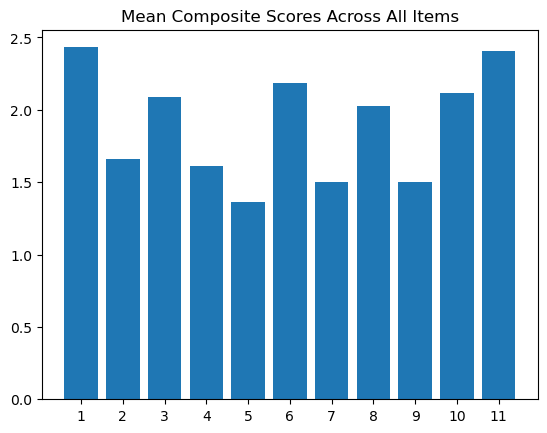

In [41]:
sudsr = np.array(dfuds.iloc[:, :11])

plt.bar(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
        mc(sudsr))
plt.title('Mean Composite Scores Across All Items')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Total Per Participant')

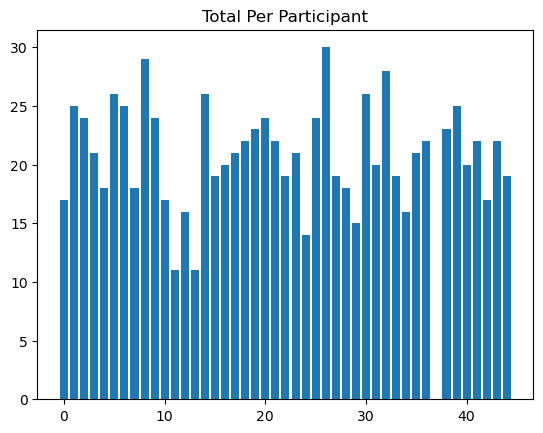

In [42]:
plt.bar(dfuds.index.tolist(), dfuds.iloc[:,11])
plt.title('Total Per Participant')

---

## Centrality of Religious Scale - 5

#### Coding freq based on [Huber and Huber (2012)](https://www.mdpi.com/2077-1444/3/3/710)

### Original Scoring

In [43]:
dfcrs = dforig.iloc[:, 27:32]
dfcrs

How often do you think about religious issues? [How often do you think about religious issues?]  \
0                                    3 (Occasionally)                                                
1                                    3 (Occasionally)                                                
2                                           4 (Often)                                                
3                                    3 (Occasionally)                                                
4                                      5 (Very Often)                                                
5                                    3 (Occasionally)                                                
6                                           4 (Often)                                                
7                                    3 (Occasionally)                                                
8                                          2 (Rarely)                                                
9                                           4 (Often)                                                
10                                   3 (Occasionally)                                                
11                                         2 (Rarely)                                                
12                                   3 (Occasionally)                                                
13                                          4 (Often)                                                
14                                         2 (Rarely)                                                
15                                         2 (Rarely)                                                
16                                   3 (Occasionally)                                                
17                                   3 (Occasionally)                                                
18                                         2 (Rarely)                                                
19                                         2 (Rarely)                                                
20                                         2 (Rarely)                                                
21                                         2 (Rarely)                                                
22                                         2 (Rarely)                                                
23                                          4 (Often)                                                
24                                   3 (Occasionally)                                                
25                                   3 (Occasionally)                                                
26                                         2 (Rarely)                                                
27                                         2 (Rarely)                                                
28                                   3 (Occasionally)                                                
29                                          4 (Often)                                                
30                                          4 (Often)                                                
31                                         2 (Rarely)                                                
32                                   3 (Occasionally)                                                
33                                   3 (Occasionally)                                                
34                                   3 (Occasionally)                                                
35                                   3 (Occasionally)                                                
36                                         2 (Rarely)                                                
37                                                NaN                                                
38                       

### Mapped and Named

In [44]:
dfcrs.rename(columns = {
                        dfcrs.columns[0]: 'Intellect', 
                        dfcrs.columns[1]: 'Ideology', 
                        dfcrs.columns[2]: 'Public Practice', 
                        dfcrs.columns[3]: 'Private Practice', 
                        dfcrs.columns[4]: 'Experience'},
             inplace = True)

scoring = {**dict.fromkeys(['1 (Never)', '1 (Not at all)'], 1), 
           **dict.fromkeys(['2 (Rarely)', '2 (Not very much)'], 2), 
           **dict.fromkeys(['3 (Occasionally)', '3 (Moderately)'], 3),
           **dict.fromkeys(['4 (Often)', '4 (Quite a bit)'], 4),
           **dict.fromkeys(['5 (Very Often)', '5 (Very much so)'], 5)
          }

dfcrs.replace(scoring, inplace = True)
dfcrs

Intellect  Ideology  Public Practice  Private Practice  Experience
0         3.0       2.0              2.0               1.0         1.0
1         3.0       5.0              2.0               2.0         1.0
2         4.0       5.0              2.0               3.0         2.0
3         3.0       5.0              4.0               5.0         3.0
4         5.0       2.0              1.0               1.0         1.0
5         3.0       4.0              2.0               3.0         3.0
6         4.0       5.0              5.0               4.0         4.0
7         3.0       4.0              2.0               2.0         3.0
8         2.0       4.0              4.0               2.0         4.0
9         4.0       1.0              1.0               1.0         1.0
10        3.0       2.0              2.0               2.0         1.0
11        2.0       3.0              1.0               2.0         2.0
12        3.0       2.0              2.0               1.0         1.0
13        4.0       4.0              3.0               4.0         3.0
14        2.0       5.0              3.0               4.0         4.0
15        2.0       3.0              2.0               3.0         3.0
16        3.0       4.0              4.0               3.0         3.0
17        3.0       2.0              2.0               1.0         2.0
18        2.0       3.0              3.0               3.0         3.0
19        2.0       4.0              2.0               2.0         3.0
20        2.0       3.0              2.0               2.0         2.0
21        2.0       3.0              3.0               3.0         3.0
22        2.0       4.0              2.0               2.0         2.0
23        4.0       4.0              4.0               3.0         2.0
24        3.0       4.0              4.0               3.0         3.0
25        3.0       4.0              4.0               5.0         3.0
26        2.0       1.0              2.0               2.0         1.0
27        2.0       2.0              2.0               1.0         1.0
28        3.0       3.0              2.0               2.0         1.0
29        4.0       2.0              2.0               2.0         1.0
30        4.0       2.0              1.0               1.0         4.0
31        2.0       3.0              2.0               2.0         2.0
32        3.0       4.0              3.0               2.0         4.0
33        3.0       1.0              2.0               2.0         2.0
34        3.0       5.0              2.0               2.0         3.0
35        3.0       3.0              2.0               2.0         1.0
36        2.0       3.0              4.0               2.0         2.0
37        NaN       NaN              NaN               NaN         NaN
38        3.0       3.0              3.0               2.0         1.0
39        2.0       3.0              3.0               2.0         2.0
40        4.0       5.0              3.0               5.0         5.0
41        2.0       5.0              4.0               5.0         5.0
42        4.0       5.0              2.0               4.0         5.0
43        2.0       2.0              1.0               1.0         1.0
44        4.0       5.0              4.0               4.0         5.0

### Descriptive Stats 

In [45]:
crsd = np.array(dfcrs)
dfcrs['Religious Score(M)'] = mr(crsd)
crsd = np.array(dfcrs)

stacked = np.stack((sc(crsd), mc(crsd)))
sum_mean = pd.DataFrame(stacked, index = ['Sum', 'Mean'], columns = dfcrs.columns)

/tmp/ipykernel_6965/132936612.py:2: RuntimeWarning: Mean of empty slice
  return np.round(np.nanmean(na, axis=1), 3)


In [46]:
def rel(df):
    if df <= 2:
        return "Not-religious"
    elif df > 2 and df < 4:
        return "Religious"
    elif df >= 4:
        return "Highly Religious"

dfcrs['Religiosity'] = dfcrs['Religious Score(M)'].apply(rel)
dfcrs

Intellect  Ideology  Public Practice  Private Practice  Experience  \
0         3.0       2.0              2.0               1.0         1.0   
1         3.0       5.0              2.0               2.0         1.0   
2         4.0       5.0              2.0               3.0         2.0   
3         3.0       5.0              4.0               5.0         3.0   
4         5.0       2.0              1.0               1.0         1.0   
5         3.0       4.0              2.0               3.0         3.0   
6         4.0       5.0              5.0               4.0         4.0   
7         3.0       4.0              2.0               2.0         3.0   
8         2.0       4.0              4.0               2.0         4.0   
9         4.0       1.0              1.0               1.0         1.0   
10        3.0       2.0              2.0               2.0         1.0   
11        2.0       3.0              1.0               2.0         2.0   
12        3.0       2.0              2.0               1.0         1.0   
13        4.0       4.0              3.0               4.0         3.0   
14        2.0       5.0              3.0               4.0         4.0   
15        2.0       3.0              2.0               3.0         3.0   
16        3.0       4.0              4.0               3.0         3.0   
17        3.0       2.0              2.0               1.0         2.0   
18        2.0       3.0              3.0               3.0         3.0   
19        2.0       4.0              2.0               2.0         3.0   
20        2.0       3.0              2.0               2.0         2.0   
21        2.0       3.0              3.0               3.0         3.0   
22        2.0       4.0              2.0               2.0         2.0   
23        4.0       4.0              4.0               3.0         2.0   
24        3.0       4.0              4.0               3.0         3.0   
25        3.0       4.0              4.0               5.0         3.0   
26        2.0       1.0              2.0               2.0         1.0   
27        2.0       2.0              2.0               1.0         1.0   
28        3.0       3.0              2.0               2.0         1.0   
29        4.0       2.0              2.0               2.0         1.0   
30        4.0       2.0              1.0               1.0         4.0   
31        2.0       3.0              2.0               2.0         2.0   
32        3.0       4.0              3.0               2.0         4.0   
33        3.0       1.0              2.0               2.0         2.0   
34        3.0       5.0              2.0               2.0         3.0   
35        3.0       3.0              2.0               2.0         1.0   
36        2.0       3.0              4.0               2.0         2.0   
37        NaN       NaN              NaN               NaN         NaN   
38        3.0       3.0              3.0               2.0         1.0   
39        2.0       3.0              3.0               2.0         2.0   
40        4.0       5.0              3.0               5.0         5.0   
41        2.0       5.0              4.0               5.0         5.0   
42        4.0       5.0              2.0               4.0         5.0   
43        2.0       2.0              1.0               1.0         1.0   
44        4.0       5.0              4.0               4.0         5.0   

    Religious Score(M)       Religiosity  
0                  1.8     Not-religious  
1                  2.6         Religious  
2                  3.2         Religious  
3                  4.0  Highly Religious  
4                  2.0     Not-religious  
5                  3.0         Religious  
6                  4.4  Highly Religious  
7                  2.8         Religious  
8                  3.2         Religious  
9                  1.6     Not-religious  
10                 2.0     Not-religious  
11                 2.0     Not-religious  
12                 1.8     Not-religious

In [47]:
sum_mean
x = np.array(dfcrs['Religious Score(M)'])
print(f'Standard Deviation of Religious Score: {sdwa(np.array(x))}')

Intellect  Ideology  Public Practice  Private Practice  Experience  \
Sum     128.000   148.000          112.000             110.0     109.000   
Mean      2.909     3.364            2.545               2.5       2.477   

      Religious Score(M)  
Sum              121.400  
Mean               2.759

Standard Deviation of Religious Score: 0.832


<Axes: title={'center': 'Mean Scores'}, ylabel='Score'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intellect'),
  Text(1, 0, 'Ideology'),
  Text(2, 0, 'Public Practice'),
  Text(3, 0, 'Private Practice'),
  Text(4, 0, 'Experience'),
  Text(5, 0, 'Religious Score(M)')])

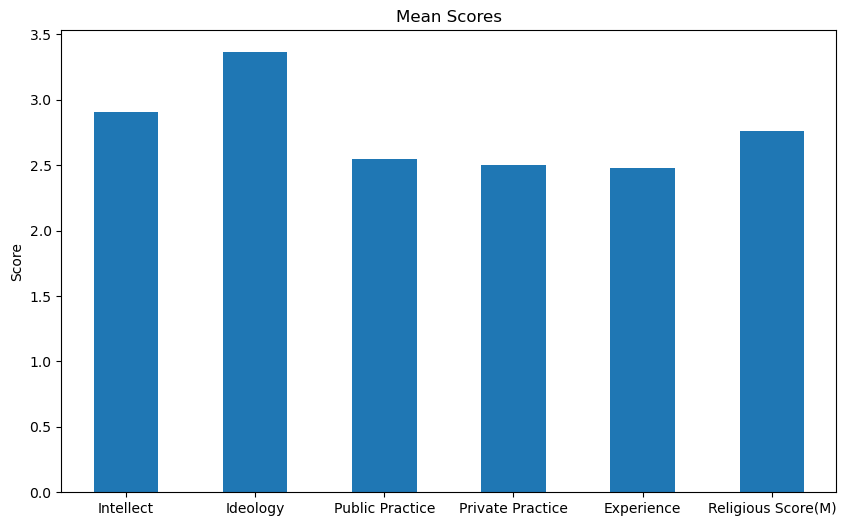

In [48]:
sum_mean.iloc[1, :].plot(kind = 'bar', title='Mean Scores', ylabel='Score', figsize=(10, 6))
plt.xticks(rotation=0)

<Axes: title={'center': 'Religiosity Frequency'}, xlabel='Religiosity', ylabel='Frequency'>

(array([0, 1, 2]),
 [Text(0, 0, 'Religious'),
  Text(1, 0, 'Not-religious'),
  Text(2, 0, 'Highly Religious')])

Religiosity
Religious           27
Not-religious       11
Highly Religious     6
Name: count, dtype: int64

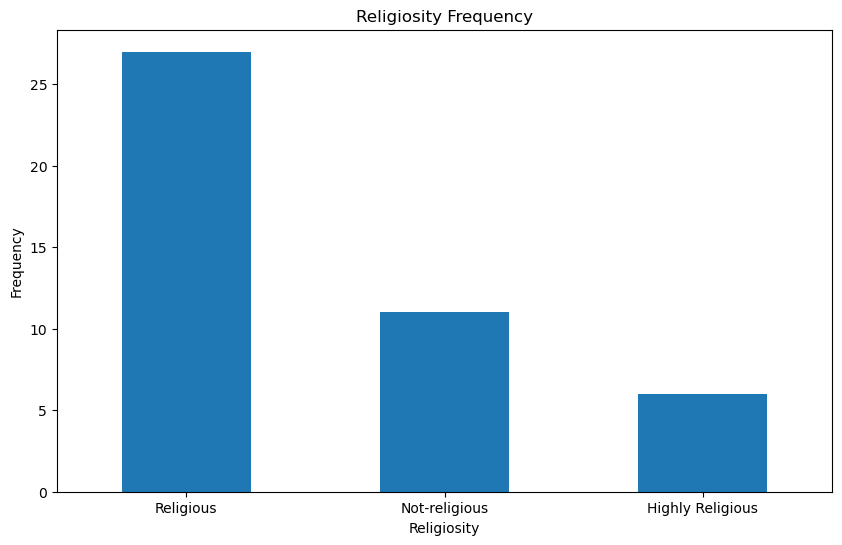

In [49]:
dfcrs['Religiosity'].value_counts().plot(kind = 'bar', title='Religiosity Frequency', ylabel='Frequency', figsize=(10, 6))
plt.xticks(rotation=0)

dfcrs['Religiosity'].value_counts()

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Mean Per Participant')

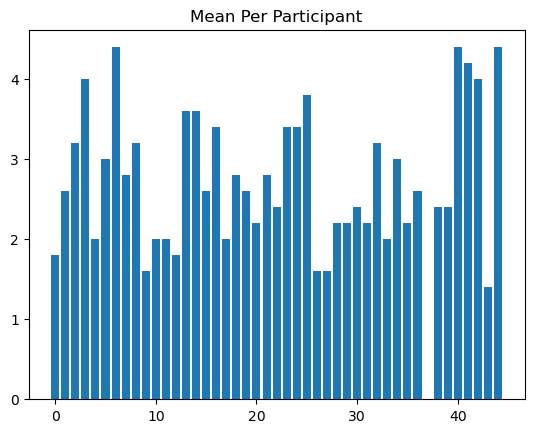

In [50]:
plt.bar(dfcrs.index.tolist(), dfcrs['Religious Score(M)'])
plt.title('Mean Per Participant')

---

## Intolerance of Uncertainty Scale - Short Version

### Original Scores

In [51]:
dfius = dforig.iloc[:, 32:44]
dfius

Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.]  \
0                   3 (Somewhat characteristic of me)                                                                            
1                                                   4                                                                            
2                                                   4                                                                            
3                                                   2                                                                            
4                                                   4                                                                            
5                   3 (Somewhat characteristic of me)                                                                            
6                   3 (Somewhat characteristic of me)                                                                            
7                   3 (Somewhat characteristic of me)                                                                            
8                                                   4                                                                            
9                                                   4                                                                            
10                                                  2                                                                            
11                                                  2                                                                            
12                                                  2                                                                            
13                                                  2                                                                            
14                                                  4                                                                            
15                  3 (Somewhat characteristic of me)                                                                            
16                  3 (Somewhat characteristic of me)                                                                            
17                  5 (Entirely characteristic of me)                                                                            
18                                                  4                                                                            
19                                                  2                                                                            
20                                                  4                                                                            
21                                                  2                                                                            
22                                                  2                                                                            
23                                                  2                                                                            
24                  3 (Somewhat characteristic of me)                                                                            
25                                                  4                                                                            
26                                                  4                                                                            
27                  3 (Somewhat characteristic of me)                                                                            
28                  3 (Somewhat characteristic of me)                                                                            
29                                                  2                                                  

### Mapped and Inted

In [52]:
dius = {
        '3 (Somewhat characteristic of me)': 3,
        '5 (Entirely characteristic of me)': 5,
        '1 (Not at all characteristic of me)': 1
       }

dfius.replace(dius, inplace=True)
dfius = dfius.astype('float')
dfius

Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.]  \
0                                                 3.0                                                                             
1                                                 4.0                                                                             
2                                                 4.0                                                                             
3                                                 2.0                                                                             
4                                                 4.0                                                                             
5                                                 3.0                                                                             
6                                                 3.0                                                                             
7                                                 3.0                                                                             
8                                                 4.0                                                                             
9                                                 4.0                                                                             
10                                                2.0                                                                             
11                                                2.0                                                                             
12                                                2.0                                                                             
13                                                2.0                                                                             
14                                                4.0                                                                             
15                                                3.0                                                                             
16                                                3.0                                                                             
17                                                5.0                                                                             
18                                                4.0                                                                             
19                                                2.0                                                                             
20                                                4.0                                                                             
21                                                2.0                                                                             
22                                                2.0                                                                             
23                                                2.0                                                                             
24                                                3.0                                                                             
25                                                4.0                                                                             
26                                                4.0                                                                             
27                                                3.0                                                                             
28                                                3.0                                                                             
29                                                2.0                     

### Descriptive Stats

In [53]:
ius_arr = np.array(dfius.iloc[:, :12])
prox_anx_arr = np.array(dfius.iloc[:, :7])
inhib_anx_arr = np.array(dfius.iloc[:, 7:12])

stk = np.stack((sr(prox_anx_arr), sr(inhib_anx_arr), sr(ius_arr)), axis=1)

stacked = pd.DataFrame(stk, columns=['Sum Prospec Anx', 'Sum Inhib Anx', 'Total IUS'])
dfius = pd.concat([dfius, stacked], axis=1)

dfius

Please choose the number that best corresponds to how much you agree with each point. [Unforeseen events upset me greatly.]  \
0                                                 3.0                                                                             
1                                                 4.0                                                                             
2                                                 4.0                                                                             
3                                                 2.0                                                                             
4                                                 4.0                                                                             
5                                                 3.0                                                                             
6                                                 3.0                                                                             
7                                                 3.0                                                                             
8                                                 4.0                                                                             
9                                                 4.0                                                                             
10                                                2.0                                                                             
11                                                2.0                                                                             
12                                                2.0                                                                             
13                                                2.0                                                                             
14                                                4.0                                                                             
15                                                3.0                                                                             
16                                                3.0                                                                             
17                                                5.0                                                                             
18                                                4.0                                                                             
19                                                2.0                                                                             
20                                                4.0                                                                             
21                                                2.0                                                                             
22                                                2.0                                                                             
23                                                2.0                                                                             
24                                                3.0                                                                             
25                                                4.0                                                                             
26                                                4.0                                                                             
27                                                3.0                                                                             
28                                                3.0                                                                             
29                                                2.0                     

In [54]:
tiusarr = np.array(dfius.iloc[:, 12:15])

print(f'IUS Composite Sum: {swa(tiusarr[:, 2])} | Prospective Anxiety Sum: {swa(tiusarr[:, 0])} | Inhibitory Anxiety Sum: {swa(tiusarr[:, 1])}')
print(f'IUS Composite Mean: {mwa(tiusarr[:, 2])} | Prospective Anxiety Mean: {mwa(tiusarr[:, 0])} | Inhibitory Anxiety Mean: {mwa(tiusarr[:, 1])}')
print(f'IUS SD Across Participants: {sdwa(tiusarr[:, 2])} | Prospective Anxiety SD: {sdwa(tiusarr[:, 0])} | Inhibitory Anxiety SD: {sdwa(tiusarr[:, 1])}')

IUS Composite Sum: 1613.0 | Prospective Anxiety Sum: 995.0 | Inhibitory Anxiety Sum: 618.0
IUS Composite Mean: 35.844 | Prospective Anxiety Mean: 22.111 | Inhibitory Anxiety Mean: 13.733
IUS SD Across Participants: 10.189 | Prospective Anxiety SD: 5.934 | Inhibitory Anxiety SD: 5.255


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

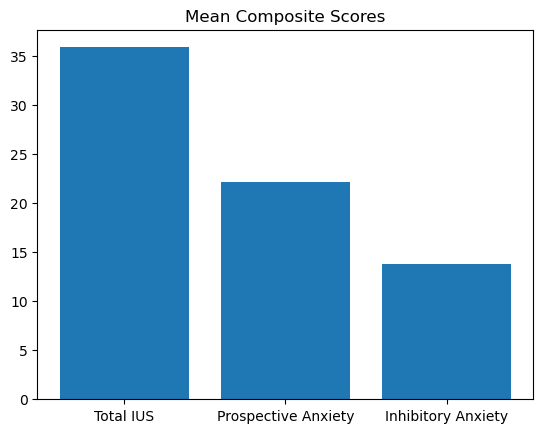

In [55]:
plt.bar(['Total IUS', 'Prospective Anxiety', 'Inhibitory Anxiety'], [mwa(tiusarr[:, 2]), mwa(tiusarr[:, 0]), mwa(tiusarr[:, 1])])
plt.title('Mean Composite Scores')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Sum Prospec Anx Per Participant')

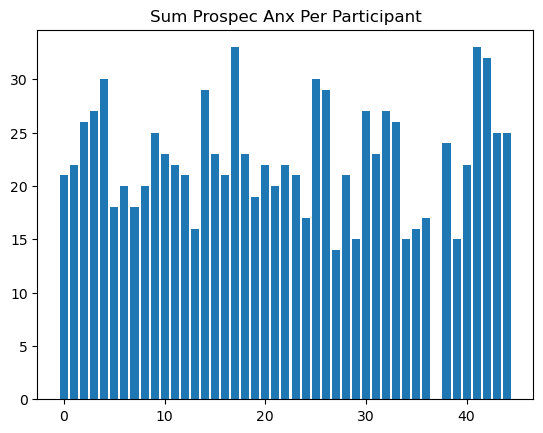

In [56]:
plt.bar(dfius.index.tolist(), dfius['Sum Prospec Anx'])
plt.title('Sum Prospec Anx Per Participant')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Sum Inhib Anx Per Participant')

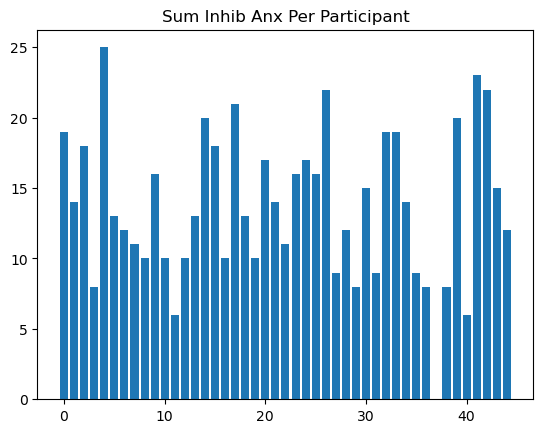

In [57]:
plt.bar(dfius.index.tolist(), dfius['Sum Inhib Anx'])
plt.title('Sum Inhib Anx Per Participant')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Total IUS Per Participant')

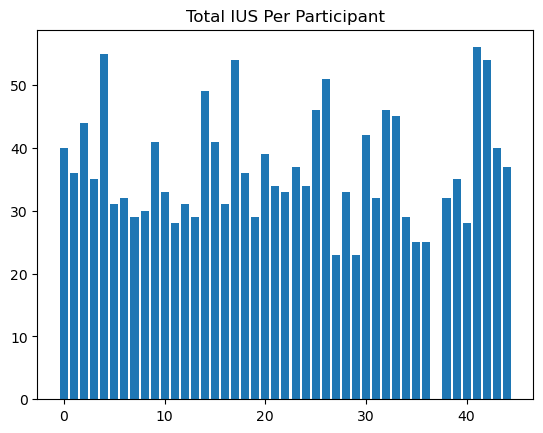

In [58]:
plt.bar(dfius.index.tolist(), dfius['Total IUS'])
plt.title('Total IUS Per Participant')

---

## Social and Economic Conservatism Scale

### Original Scale

In [59]:
dfsec = dforig.iloc[:, 44:56]
dfsec

Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Abortion.]  \
0                                      100 (Positive)                                                                                                                                                                                                       
1                                        50 (Neutral)                                                                                                                                                                                                       
2                                        50 (Neutral)                                                                                                                                                                                                       
3                                      100 (Positive)                                                                                                                                                                                                       
4                                                  60                                                                                                                                                                                                       
5                                                  10                                                                                                                                                                                                       
6                                        50 (Neutral)                                                                                                                                                                                                       
7                                        50 (Neutral)                                                                                                                                                                                                       
8                                        50 (Neutral)                                                                                                                                                                                                       
9                                      100 (Positive)                                                                                                                                                                                                       
10                                       50 (Neutral)                                                                                                                                                                                                       
11                                       50 (Neutral)                                                                                                                                                                                                       
12                                       50 (Neutral)                                                                                                                                                                                                       
13                                                 60                                                                                                                                                                                                       
14                                       50 (Neutral)                                                                                                                                                           

### Mapped, Inted and Reversed

In [60]:
map = {'100 (Positive)': 100,
       '50 (Neutral)': 50,
       '0 (Negative)': 0
      }

dfsec.replace(map, inplace=True)
dfsec = dfsec.astype('float')

dfsec.iloc[:, [0, 4]] = 100 - dfsec.iloc[:, [0, 4]]

dfsec

Please indicate the extent to which you feel positive or negative towards each issue. Scores of 0 indicate greater negativity, and scores of 100 indicate greater positivity. Scores of 50 indicate that you feel neutral about the issue. [Abortion.]  \
0                                                 0.0                                                                                                                                                                                                        
1                                                50.0                                                                                                                                                                                                        
2                                                50.0                                                                                                                                                                                                        
3                                                 0.0                                                                                                                                                                                                        
4                                                40.0                                                                                                                                                                                                        
5                                                90.0                                                                                                                                                                                                        
6                                                50.0                                                                                                                                                                                                        
7                                                50.0                                                                                                                                                                                                        
8                                                50.0                                                                                                                                                                                                        
9                                                 0.0                                                                                                                                                                                                        
10                                               50.0                                                                                                                                                                                                        
11                                               50.0                                                                                                                                                                                                        
12                                               50.0                                                                                                                                                                                                        
13                                               40.0                                                                                                                                                                                                        
14                                               50.0                                                                                                                                             

### Descriptive Statistics

In [61]:
secs_arr = np.array(dfsec.iloc[:, :12])
ssecs = secs_arr[:, [0, 10, 3, 6, 7, 11, 2]]
esecs = secs_arr[:, [1, 4, 5, 8, 9]]

sum_stack = np.stack((sr(ssecs), sr(esecs), sr(secs_arr)), axis=1)
mean_stack = np.stack((mr(ssecs), mr(esecs), mr(secs_arr)), axis=1)

scsecs = pd.concat([pd.DataFrame(sum_stack, columns=['Sum Social Con', 'Sum Eco Con', 'Sum SECS']), 
                    pd.DataFrame(mean_stack, columns=['Mean Social Con', 'Mean Eco Con', 'Mean SECS'])],
                    axis=1)

scsecs

/tmp/ipykernel_6965/132936612.py:2: RuntimeWarning: Mean of empty slice
  return np.round(np.nanmean(na, axis=1), 3)


Sum Social Con  Sum Eco Con  Sum SECS  Mean Social Con  Mean Eco Con  \
0            230.0        200.0     430.0           32.857          40.0   
1            350.0        150.0     500.0           50.000          30.0   
2            350.0        180.0     530.0           50.000          36.0   
3            510.0        300.0     810.0           72.857          60.0   
4            270.0        140.0     410.0           38.571          28.0   
5            480.0        190.0     670.0           68.571          38.0   
6            330.0        180.0     510.0           47.143          36.0   
7            420.0        220.0     640.0           60.000          44.0   
8            350.0        210.0     560.0           50.000          42.0   
9            140.0        240.0     380.0           20.000          48.0   
10           380.0        250.0     630.0           54.286          50.0   
11           520.0        130.0     650.0           74.286          26.0   
12           360.0        210.0     570.0           51.429          42.0   
13           240.0        160.0     400.0           34.286          32.0   
14           440.0        180.0     620.0           62.857          36.0   
15           370.0        270.0     640.0           52.857          54.0   
16           270.0        220.0     490.0           38.571          44.0   
17           270.0        170.0     440.0           38.571          34.0   
18           510.0        300.0     810.0           72.857          60.0   
19           410.0        300.0     710.0           58.571          60.0   
20           410.0        230.0     640.0           58.571          46.0   
21           460.0        210.0     670.0           65.714          42.0   
22           350.0        250.0     600.0           50.000          50.0   
23           330.0        260.0     590.0           47.143          52.0   
24           320.0        230.0     550.0           45.714          46.0   
25           450.0        180.0     630.0           64.286          36.0   
26            90.0        220.0     310.0           12.857          44.0   
27           300.0        170.0     470.0           42.857          34.0   
28           300.0        170.0     470.0           42.857          34.0   
29           360.0        180.0     540.0           51.429          36.0   
30            60.0        350.0     410.0            8.571          70.0   
31           220.0        260.0     480.0           31.429          52.0   
32           510.0        280.0     790.0           72.857          56.0   
33           240.0        210.0     450.0           34.286          42.0   
34           410.0        300.0     710.0           58.571          60.0   
35           350.0        260.0     610.0           50.000          52.0   
36           480.0        310.0     790.0           68.571          62.0   
37             0.0          0.0       0.0              NaN           NaN   
38           400.0        170.0     570.0           57.143          34.0   
39           360.0        240.0     600.0           51.429          48.0   
40           440.0        170.0     610.0           62.857          34.0   
41           510.0        190.0     700.0           72.857          38.0   
42           430.0         90.0     520.0           61.429          18.0   
43           250.0        250.0     500.0           35.714          50.0   
44           370.0        120.0     490.0           52.857          24.0   

    Mean SECS  
0      35.833  
1      41.667  
2      44.167  
3      67.500  
4      34.167  
5      55.833  
6      42.500  
7      53.333  
8      46.667  
9      31.667  
10     52.500  
11     54.167  
12     47.500  
13     33.333  
14     51.667  
15     53.333  
16     40.833  
17     36.667  
18     67.500  
19     59.167  
20     53.333  
21     55.833  
22     50.000  
23     49.167  
24     45.833  
25     52.500  
26     25.833  
27     39.167  
28     39.167  
29     45.000  
30     34.1

In [62]:
n = '\n'
print(f'Standard Deviation In Order of Table: {n}{sdwa(sum_stack[:, 0])} | {sdwa(sum_stack[:, 1])} | {sdwa(sum_stack[:, 2])}{n}{sdwa(mean_stack[:, 0])} | {sdwa(mean_stack[:, 1])} | {sdwa(mean_stack[:, 2])}')

Standard Deviation In Order of Table: 
119.182 | 63.778 | 144.297
15.475 | 11.179 | 9.882


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

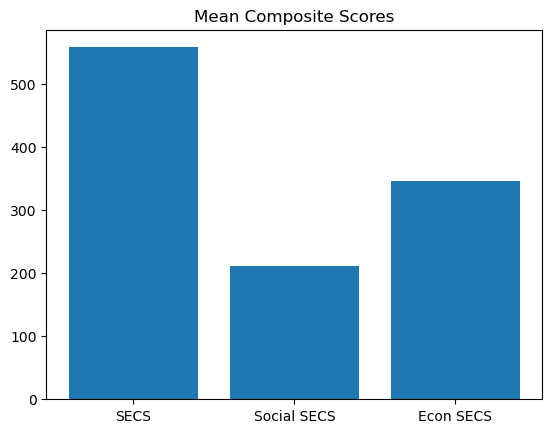

In [63]:
plt.bar(['SECS', 'Social SECS', 'Econ SECS'], [mwa(sum_stack[:, 2]), mwa(sum_stack[:, 1]), mwa(sum_stack[:, 0])])
plt.title('Mean Composite Scores')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Mean Social Con Per Participant')

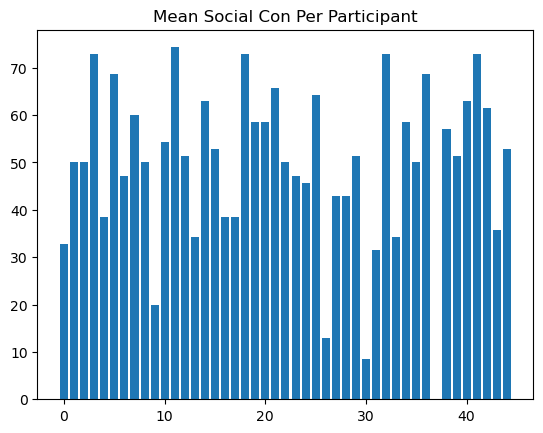

In [64]:
plt.bar(scsecs.index.tolist(), scsecs['Mean Social Con'])
plt.title('Mean Social Con Per Participant')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Mean Eco Con Per Participant')

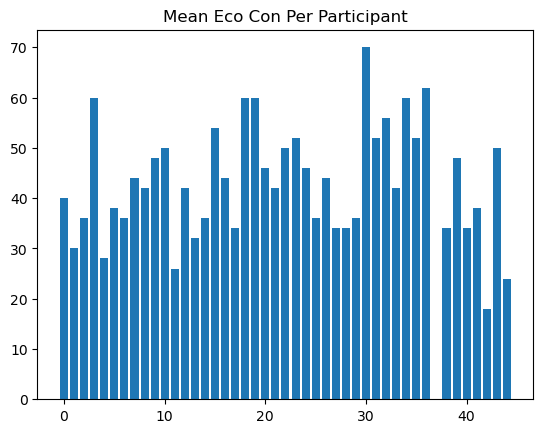

In [65]:
plt.bar(scsecs.index.tolist(), scsecs['Mean Eco Con'])
plt.title('Mean Eco Con Per Participant')

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Mean SECS Per Participant')

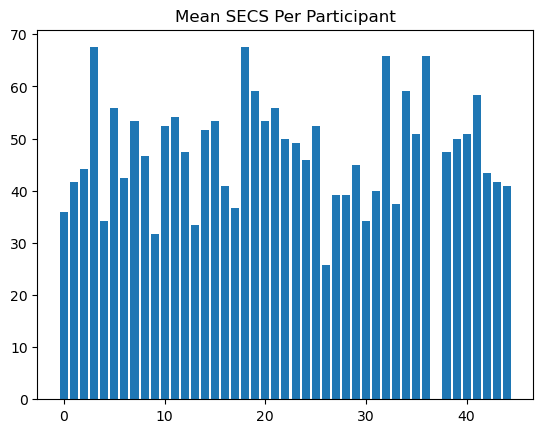

In [66]:
plt.bar(scsecs.index.tolist(), scsecs['Mean SECS'])
plt.title('Mean SECS Per Participant')

---

## Right Wing Authoritarianism 3-Dimensional Scale

### Original Scale

In [67]:
dfrwa = dforig.iloc[:, 56:68]
dfrwa

People should develop their own personal standards about good and evil and pay less attention to the Bible and other old, traditional forms of religious guidance.  \
0                                                 5.0                                                                                                                    
1                                                 3.0                                                                                                                    
2                                                 5.0                                                                                                                    
3                                                 4.0                                                                                                                    
4                                                 6.0                                                                                                                    
5                                                 5.0                                                                                                                    
6                                                 2.0                                                                                                                    
7                                                 3.0                                                                                                                    
8                                                 4.0                                                                                                                    
9                                                 7.0                                                                                                                    
10                                                5.0                                                                                                                    
11                                                5.0                                                                                                                    
12                                                6.0                                                                                                                    
13                                                2.0                                                                                                                    
14                                                4.0                                                                                                                    
15                                                5.0                                                                                                                    
16                                                3.0                                                                                                                    
17                                                5.0                                                                                                                    
18                                                4.0                                                                                                                    
19                                                5.0                                                                                                                    
20                                                3.0                                                                                                                    
21                                                6.0                                                                                                                    
22                                                6.0                                         

### Reversed

In [68]:
dfrwa.iloc[:, [4, 10, 2, 8, 0, 6]] = 8 - dfrwa.iloc[:, [4, 10, 2, 8, 0, 6]]
dfrwa

People should develop their own personal standards about good and evil and pay less attention to the Bible and other old, traditional forms of religious guidance.  \
0                                                 3.0                                                                                                                    
1                                                 5.0                                                                                                                    
2                                                 3.0                                                                                                                    
3                                                 4.0                                                                                                                    
4                                                 2.0                                                                                                                    
5                                                 3.0                                                                                                                    
6                                                 6.0                                                                                                                    
7                                                 5.0                                                                                                                    
8                                                 4.0                                                                                                                    
9                                                 1.0                                                                                                                    
10                                                3.0                                                                                                                    
11                                                3.0                                                                                                                    
12                                                2.0                                                                                                                    
13                                                6.0                                                                                                                    
14                                                4.0                                                                                                                    
15                                                3.0                                                                                                                    
16                                                5.0                                                                                                                    
17                                                3.0                                                                                                                    
18                                                4.0                                                                                                                    
19                                                3.0                                                                                                                    
20                                                5.0                                                                                                                    
21                                                2.0                                                                                                                    
22                                                2.0                                         

### Descriptive Statistics

In [69]:
rwa_array = np.array(dfrwa)
agg = rwa_array[:, [1, 7, 4, 10]]
sub = rwa_array[:, [5, 11, 2, 8]]
conv = rwa_array[:, [3, 9, 0, 6]]

sum_stack = np.stack([sr(agg), sr(sub), sr(conv), sr(rwa_array)], axis=1)
mean_stack = np.stack([mr(agg), mr(sub), mr(conv), mr(rwa_array)], axis=1)

res = pd.concat([pd.DataFrame(sum_stack, columns=['Aggression Sum', 'Submission Sum', 'Conventionalism Sum', 'RWA Sum']),
                 pd.DataFrame(mean_stack, columns=['Aggression Mean', 'Submission Mean', 'Conventionalism Mean', 'RWA Mean'])],
                 axis=1)
res

/tmp/ipykernel_6965/132936612.py:2: RuntimeWarning: Mean of empty slice
  return np.round(np.nanmean(na, axis=1), 3)


Aggression Sum  Submission Sum  Conventionalism Sum  RWA Sum  \
0              9.0            15.0                 15.0     39.0   
1             13.0            12.0                 12.0     37.0   
2             19.0            16.0                 13.0     48.0   
3             16.0            10.0                 17.0     43.0   
4             11.0             7.0                 10.0     28.0   
5             17.0            17.0                 15.0     49.0   
6             16.0            12.0                 18.0     46.0   
7             20.0            13.0                 16.0     49.0   
8             16.0             8.0                 18.0     42.0   
9             10.0            13.0                  9.0     32.0   
10            16.0             7.0                  8.0     31.0   
11            19.0            15.0                 11.0     45.0   
12            18.0            13.0                 12.0     43.0   
13            15.0            11.0                 17.0     43.0   
14            16.0            19.0                 18.0     53.0   
15            19.0            15.0                 12.0     46.0   
16            14.0            10.0                 11.0     35.0   
17            12.0             8.0                 11.0     31.0   
18            16.0            17.0                 16.0     49.0   
19            16.0            17.0                 17.0     50.0   
20            17.0            16.0                 18.0     51.0   
21            16.0            19.0                 16.0     51.0   
22            17.0            13.0                 14.0     44.0   
23            16.0            11.0                 13.0     40.0   
24            12.0             6.0                 15.0     33.0   
25            16.0            18.0                 16.0     50.0   
26             6.0             6.0                  5.0     17.0   
27            15.0            12.0                 12.0     39.0   
28            15.0             8.0                 14.0     37.0   
29            14.0             9.0                  9.0     32.0   
30             5.0             4.0                  6.0     15.0   
31            19.0            17.0                 14.0     50.0   
32            17.0            19.0                 16.0     52.0   
33            16.0             7.0                  8.0     31.0   
34            16.0            16.0                 17.0     49.0   
35            19.0            16.0                 15.0     50.0   
36            16.0            17.0                 21.0     54.0   
37             0.0             0.0                  0.0      0.0   
38            22.0            13.0                 10.0     45.0   
39            19.0            13.0                 12.0     44.0   
40            16.0            11.0                 15.0     42.0   
41            12.0            24.0                 14.0     50.0   
42            14.0            13.0                 14.0     41.0   
43            13.0             6.0                  4.0     23.0   
44            13.0             6.0                 17.0     36.0   

    Aggression Mean  Submission Mean  Conventionalism Mean  RWA Mean  
0              2.25             3.75                  3.75     3.250  
1              3.25             3.00                  3.00     3.083  
2              4.75             4.00                  3.25     4.000  
3              4.00             2.50                  4.25     3.583  
4              2.75             1.75                  2.50     2.333  
5              4.25             4.25                  3.75     4.083  
6              4.00             3.00                  4.50     3.833  
7              5.00             3.25                  4.00     4.083  
8              4.00             2.00                  4.50     3.500  
9              2.50             3.25                  2.25     2.667  
10             4.00             1.75                  2.00     2.583  
11             4.75    

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Mean Across All Participants')

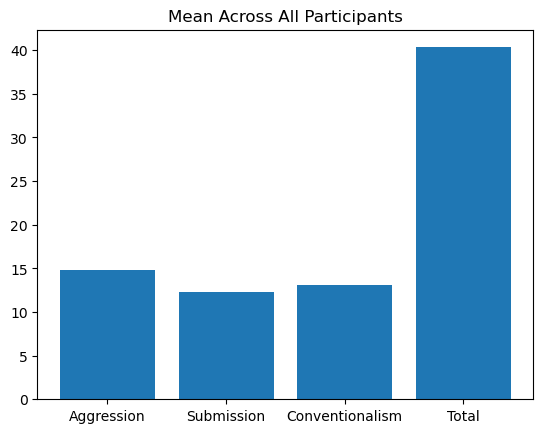

In [70]:
plt.bar(['Aggression', 'Submission', 'Conventionalism', 'Total'], [mwa(sum_stack[:, 0]), mwa(sum_stack[:, 1]), mwa(sum_stack[:, 2]), mwa(sum_stack[:, 3])])
plt.title('Mean Across All Participants')

---

## Social Dominance Orientation Scale

### Original Scale

In [71]:
dfsdo = dforig.iloc[:, 68:76]
dfsdo

Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [An ideal society requires some groups to be on top and others to be on the bottom.]  \
0                                 1 (Strongly Oppose)                                                                                                                                                                                                          
1                                 2 (Somewhat Oppose)                                                                                                                                                                                                          
2                                 1 (Strongly Oppose)                                                                                                                                                                                                          
3                                 6 (Somewhat Favour)                                                                                                                                                                                                          
4                                 1 (Strongly Oppose)                                                                                                                                                                                                          
5                                 3 (Slightly Oppose)                                                                                                                                                                                                          
6                                         4 (Neutral)                                                                                                                                                                                                          
7                                 2 (Somewhat Oppose)                                                                                                                                                                                                          
8                                 6 (Somewhat Favour)                                                                                                                                                                                                          
9                                 5 (Slightly Favour)                                                                                                                                                                                                          
10                                1 (Strongly Oppose)                                                                                                                                                                                                          
11                                5 (Slightly Favour)                                                                                                                                                                                                          
12                                3 (Slightly Oppose)                                                                                                                                                                                                          
13                                2 (Somewhat Oppose)                                                                                                                                                                                                          
14                                3 (Slightly Oppose)                                                                                                              

### Mapped and Reversed

In [72]:
map = {'1 (Strongly Oppose)': 1,
       '2 (Somewhat Oppose)': 2,
       '3 (Slightly Oppose)': 3,
       '4 (Neutral)': 4,
       '5 (Slightly Favour)': 5,
       '6 (Somewhat Favour)': 6,
       '7 (Strongly Favour)': 7
      }

dfsdo.replace(map, inplace=True)

dfsdo.iloc[:, [2, 3, 6, 7]] = 8 - dfsdo.iloc[:, [2, 3, 6, 7]]

dfsdo

Show how much you favour or oppose each idea below by selecting a number from 1 to 7 on the scale below. You can work quickly; your first feeling is generally best. [An ideal society requires some groups to be on top and others to be on the bottom.]  \
0                                                 1.0                                                                                                                                                                                                           
1                                                 2.0                                                                                                                                                                                                           
2                                                 1.0                                                                                                                                                                                                           
3                                                 6.0                                                                                                                                                                                                           
4                                                 1.0                                                                                                                                                                                                           
5                                                 3.0                                                                                                                                                                                                           
6                                                 4.0                                                                                                                                                                                                           
7                                                 2.0                                                                                                                                                                                                           
8                                                 6.0                                                                                                                                                                                                           
9                                                 5.0                                                                                                                                                                                                           
10                                                1.0                                                                                                                                                                                                           
11                                                5.0                                                                                                                                                                                                           
12                                                3.0                                                                                                                                                                                                           
13                                                2.0                                                                                                                                                                                                           
14                                                3.0                                                                                                

### Descriptive Statistics

In [73]:
sdo_array = np.array(dfsdo)
sdod = sdo_array[:, :4]
sdoe = sdo_array[:, 4:]

mean_stk = np.stack([mr(sdod), mr(sdoe), mr(sdo_array)], axis=1)
sum_stk = np.stack([sr(sdod), sr(sdoe), sr(sdo_array)], axis=1)

mean_sdo = pd.concat([(pd.DataFrame(sum_stk, columns=['Sum SDO-D', 'Sum SDO-E', 'Sum SDO'])), 
                      (pd.DataFrame(mean_stk, columns=['Mean SDO-D', 'Mean SDO-E', 'Mean SDO']))],
                     axis=1)
mean_sdo

/tmp/ipykernel_6965/132936612.py:2: RuntimeWarning: Mean of empty slice
  return np.round(np.nanmean(na, axis=1), 3)


Sum SDO-D  Sum SDO-E  Sum SDO  Mean SDO-D  Mean SDO-E  Mean SDO
0        16.0       10.0     26.0        4.00        2.50     3.250
1         5.0        9.0     14.0        1.25        2.25     1.750
2        12.0       12.0     24.0        3.00        3.00     3.000
3        11.0        7.0     18.0        2.75        1.75     2.250
4         4.0        4.0      8.0        1.00        1.00     1.000
5        13.0       12.0     25.0        3.25        3.00     3.125
6        15.0       13.0     28.0        3.75        3.25     3.500
7         8.0       14.0     22.0        2.00        3.50     2.750
8        16.0        8.0     24.0        4.00        2.00     3.000
9        21.0       14.0     35.0        5.25        3.50     4.375
10        7.0        4.0     11.0        1.75        1.00     1.375
11       16.0       13.0     29.0        4.00        3.25     3.625
12        9.0        8.0     17.0        2.25        2.00     2.125
13       10.0        8.0     18.0        2.50        2.00     2.250
14       12.0       14.0     26.0        3.00        3.50     3.250
15       21.0        6.0     27.0        5.25        1.50     3.375
16        8.0        7.0     15.0        2.00        1.75     1.875
17        7.0        7.0     14.0        1.75        1.75     1.750
18       16.0       11.0     27.0        4.00        2.75     3.375
19       16.0       10.0     26.0        4.00        2.50     3.250
20       18.0       15.0     33.0        4.50        3.75     4.125
21       17.0       11.0     28.0        4.25        2.75     3.500
22       21.0       17.0     38.0        5.25        4.25     4.750
23       10.0        9.0     19.0        2.50        2.25     2.375
24       12.0       12.0     24.0        3.00        3.00     3.000
25       13.0        7.0     20.0        3.25        1.75     2.500
26        4.0        4.0      8.0        1.00        1.00     1.000
27       11.0       12.0     23.0        2.75        3.00     2.875
28       11.0        9.0     20.0        2.75        2.25     2.500
29        9.0        7.0     16.0        2.25        1.75     2.000
30        4.0       11.0     15.0        1.00        2.75     1.875
31       14.0        7.0     21.0        3.50        1.75     2.625
32       12.0        6.0     18.0        3.00        1.50     2.250
33        8.0       15.0     23.0        2.00        3.75     2.875
34       16.0       16.0     32.0        4.00        4.00     4.000
35       19.0       12.0     31.0        4.75        3.00     3.875
36       17.0       16.0     33.0        4.25        4.00     4.125
37        0.0        0.0      0.0         NaN         NaN       NaN
38        6.0       12.0     18.0        1.50        3.00     2.250
39        9.0        6.0     15.0        2.25        1.50     1.875
40       12.0        8.0     20.0        3.00        2.00     2.500
41       24.0        8.0     32.0        6.00        2.00     4.000
42       11.0        5.0     16.0        2.75        1.25     2.000
43        6.0        9.0     15.0        1.50        2.25     1.875
44       10.0        4.0     14.0        2.50        1.00     1.750

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Composite Scores')

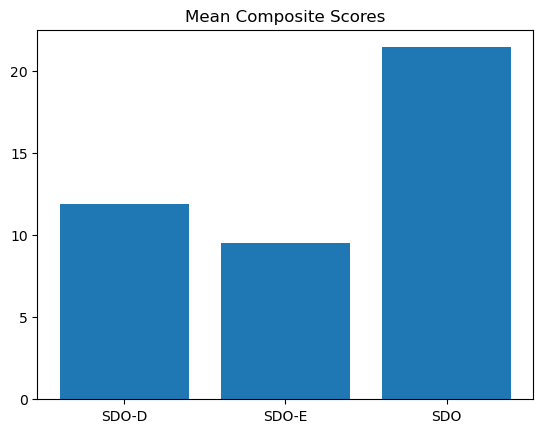

In [74]:
plt.bar(['SDO-D', 'SDO-E', 'SDO'], [mwa(sum_stk[:, 0]), mwa(sum_stk[:, 1]), mwa(sum_stk[:, 2])])
plt.title('Mean Composite Scores')

---

## Behavioural Inhibition System/Behavioural Activation System Scale

### Original Scale

In [75]:
dfbisbas = dforig.iloc[:, 76:96]
dfbisbas

Even if something bad is about to happen to me, I rarely experience fear or nervousness.   \
0                                                 1.0                                           
1                                                 2.0                                           
2                                                 1.0                                           
3                                                 2.0                                           
4                                                 1.0                                           
5                                                 2.0                                           
6                                                 1.0                                           
7                                                 1.0                                           
8                                                 2.0                                           
9                                                 2.0                                           
10                                                2.0                                           
11                                                3.0                                           
12                                                2.0                                           
13                                                1.0                                           
14                                                1.0                                           
15                                                2.0                                           
16                                                2.0                                           
17                                                1.0                                           
18                                                3.0                                           
19                                                3.0                                           
20                                                1.0                                           
21                                                2.0                                           
22                                                2.0                                           
23                                                2.0                                           
24                                                1.0                                           
25                                                1.0                                           
26                                                1.0                                           
27                                                1.0                                           
28                                                2.0                                           
29                                                1.0                                           
30                                                2.0                                           
31                                                3.0                                           
32                                                3.0                                           
33                                                1.0                                           
34                                                1.0                                           
35                                                2.0                                           
36                                                2.0                                           
37                                                NaN                                           
38                                                3.0                                           
39                                                1.0                                           
40                         

### Inted and Reversed

In [76]:
keep = [col for col in range(len(dfbisbas.columns)) if col not in [0, 17]]
dfbisbas.iloc[:, keep] = 5 - dfbisbas.iloc[:, keep]

dfbisbas

Even if something bad is about to happen to me, I rarely experience fear or nervousness.   \
0                                                 1.0                                           
1                                                 2.0                                           
2                                                 1.0                                           
3                                                 2.0                                           
4                                                 1.0                                           
5                                                 2.0                                           
6                                                 1.0                                           
7                                                 1.0                                           
8                                                 2.0                                           
9                                                 2.0                                           
10                                                2.0                                           
11                                                3.0                                           
12                                                2.0                                           
13                                                1.0                                           
14                                                1.0                                           
15                                                2.0                                           
16                                                2.0                                           
17                                                1.0                                           
18                                                3.0                                           
19                                                3.0                                           
20                                                1.0                                           
21                                                2.0                                           
22                                                2.0                                           
23                                                2.0                                           
24                                                1.0                                           
25                                                1.0                                           
26                                                1.0                                           
27                                                1.0                                           
28                                                2.0                                           
29                                                1.0                                           
30                                                2.0                                           
31                                                3.0                                           
32                                                3.0                                           
33                                                1.0                                           
34                                                1.0                                           
35                                                2.0                                           
36                                                2.0                                           
37                                                NaN                                           
38                                                3.0                                           
39                                                1.0                                           
40                         

### Descriptive Statistics

In [77]:
sdo_array = np.array(dfbisbas)

basd = sr(sdo_array[:, [1, 6, 8, 16]])
basf = sr(sdo_array[:, [3, 7, 11, 15]])
basr = sr(sdo_array[:, [2, 4, 10, 13, 18]])
bis = sr(sdo_array[:, [0, 5, 9, 12, 14, 17, 19]])

basind = [col for col in range(len(dfbisbas.columns)) if col not in [0, 5, 9, 12, 14, 17, 19]]
basind = sr(sdo_array[:, basind])

subsdo = np.stack((basd, basf, basr, bis, basind), axis=1)

pd_subsdo = pd.DataFrame(subsdo, columns=['BAS Drive', 'BAS Fun Seeking', 'BAS Reward Response', 'BIS', 'BAS Index'])

pd_subsdo

BAS Drive  BAS Fun Seeking  BAS Reward Response   BIS  BAS Index
0         7.0              8.0                 12.0  11.0       27.0
1        13.0             10.0                 10.0  17.0       33.0
2         7.0              7.0                  7.0   8.0       21.0
3         9.0             12.0                  6.0  17.0       27.0
4        13.0             13.0                 10.0   8.0       36.0
5         9.0              9.0                 10.0  14.0       28.0
6        11.0              9.0                  7.0  13.0       27.0
7        13.0              5.0                  8.0  14.0       26.0
8         8.0              8.0                 11.0  17.0       27.0
9         6.0              5.0                  6.0  12.0       17.0
10        5.0              4.0                  6.0  21.0       15.0
11        8.0             12.0                  8.0  20.0       28.0
12        8.0              7.0                  6.0  12.0       21.0
13       10.0             12.0                 11.0  13.0       33.0
14        9.0             10.0                  6.0   7.0       25.0
15       12.0             12.0                  7.0  15.0       31.0
16        9.0              8.0                  8.0  13.0       25.0
17       11.0             13.0                  9.0   7.0       33.0
18        9.0              8.0                  9.0  16.0       26.0
19        6.0              6.0                  8.0  22.0       20.0
20       10.0             10.0                  9.0  16.0       29.0
21       11.0              8.0                  6.0  13.0       25.0
22        5.0              5.0                  5.0  15.0       15.0
23        9.0              9.0                  8.0  10.0       26.0
24       14.0             10.0                  6.0  10.0       30.0
25        4.0              6.0                  7.0  15.0       17.0
26        9.0             14.0                 11.0   7.0       34.0
27        6.0              9.0                  7.0  13.0       22.0
28        8.0              7.0                 10.0  16.0       25.0
29        9.0              9.0                 10.0  11.0       28.0
30        6.0              8.0                  9.0  18.0       23.0
31        9.0             10.0                  7.0  19.0       26.0
32        7.0              8.0                  9.0  14.0       24.0
33        8.0              7.0                  8.0  12.0       23.0
34        9.0              6.0                  7.0  13.0       22.0
35        7.0             12.0                  9.0  14.0       28.0
36        8.0             13.0                 11.0  16.0       32.0
37        0.0              0.0                  0.0   0.0        0.0
38        9.0              6.0                 10.0  18.0       25.0
39       11.0              8.0                 10.0   9.0       29.0
40       10.0             10.0                 10.0  10.0       30.0
41        6.0             13.0                  6.0   9.0       25.0
42       14.0             12.0                  7.0   7.0       33.0
43        7.0              6.0                  5.0   9.0       18.0
44        6.0              5.0                  5.0  11.0       16.0

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Composite Scores')

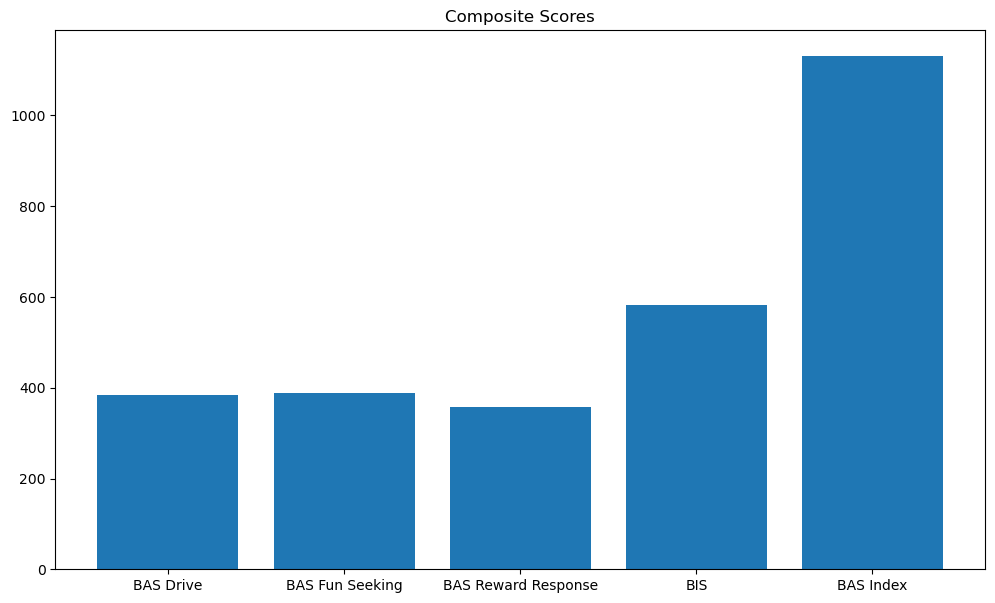

In [78]:
plt.rcParams["figure.figsize"] = (12,7)
plt.bar(['BAS Drive', 'BAS Fun Seeking', 'BAS Reward Response', 'BIS', 'BAS Index'], [swa(basd), swa(basf), swa(basr), swa(bis), swa(basind)])
plt.title('Composite Scores')

---

# SP/SR

In [79]:
dfspsr = dforig.iloc[:, 96:144]
dfspsr

Please indicate if you agree or disagree with the statements below. [Do you often refrain from doing something because you are afraid of it being illegal?]  \
0                                                  No                                                                                                            
1                                                  No                                                                                                            
2                                                  No                                                                                                            
3                                                 Yes                                                                                                            
4                                                 Yes                                                                                                            
5                                                 Yes                                                                                                            
6                                                 Yes                                                                                                            
7                                                 Yes                                                                                                            
8                                                 Yes                                                                                                            
9                                                 Yes                                                                                                            
10                                                 No                                                                                                            
11                                                 No                                                                                                            
12                                                Yes                                                                                                            
13                                                Yes                                                                                                            
14                                                Yes                                                                                                            
15                                                Yes                                                                                                            
16                                                 No                                                                                                            
17                                                Yes                                                                                                            
18                                                Yes                                                                                                            
19                                                Yes                                                                                                            
20                                                Yes                                                                                                            
21                                                Yes                                                                                                            
22                                                Yes                                                                                                            
23                                                Yes                                                              

In [80]:
pun = np.array([1 , 3 , 5 , 7 , 9 , 11 , 13 , 15 , 17 , 19 , 21 , 23 , 25 , 27 , 29 , 31 , 33 , 35 , 37 , 39 , 41 , 43 , 45 , 47]) - 1
rew = np.array([2 , 4 , 6 , 8 , 10 , 12 , 14 , 16 , 18 , 20 , 22 , 24 , 26 , 28 , 30 , 32 , 34 , 36 , 38 , 40 , 42 , 44 , 46 , 48]) - 1

punishment = sr(np.array(dfspsr.iloc[:, pun] == 'Yes'))
reward = sr(np.array(dfspsr.iloc[:, rew] == 'Yes'))

spsr = np.stack((punishment, reward), axis=0)

pr = pd.DataFrame(spsr, index = ['Punishment', 'Reward'])
tpr = pd.DataFrame(sr(spsr), index = ['Punishment', 'Reward'], columns = ['Total'])

prtpr = pr.merge(tpr, left_index = True, right_index=True)

prtpr

0   1   2  3   4   5  6   7   8   9  ...  36  37  38  39  40  41  \
Punishment  19  14  20  8  23  16  5  18  11  20  ...  14   0   7  19  23  19   
Reward       9   1  16  6   9  17  7  12   7  20  ...   9   0  11   5   7  12   

            42  43  44  Total  
Punishment  19  14  17    619  
Reward       7  13  10    459  

[2 rows x 46 columns]

## Descriptive Statistics

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Total Punishment and Reward Sensitvity')

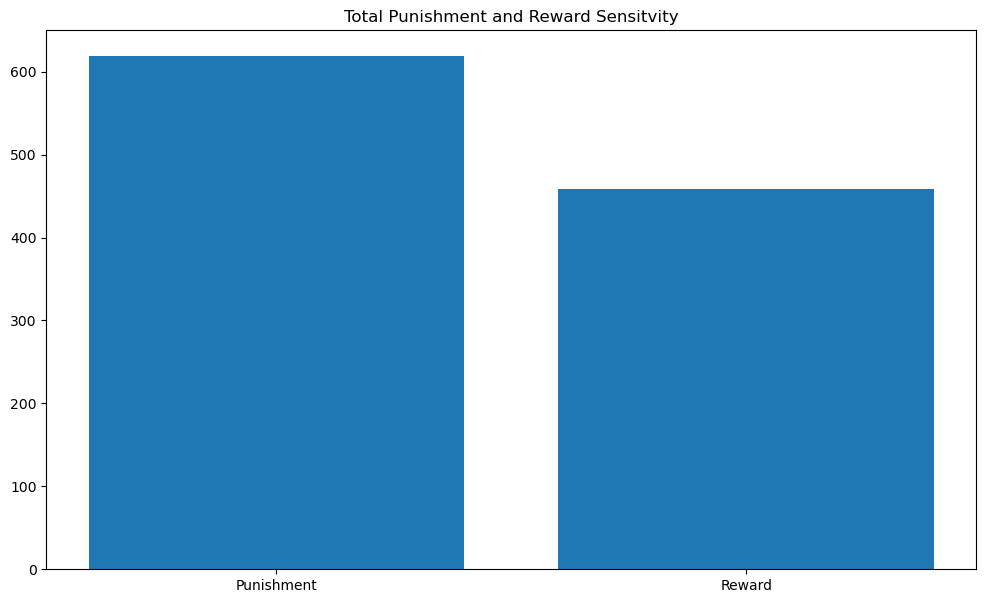

In [81]:
plt.bar(['Punishment', 'Reward'], prtpr["Total"])
plt.title("Total Punishment and Reward Sensitvity")

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Punishment Sensitvity per Participant')

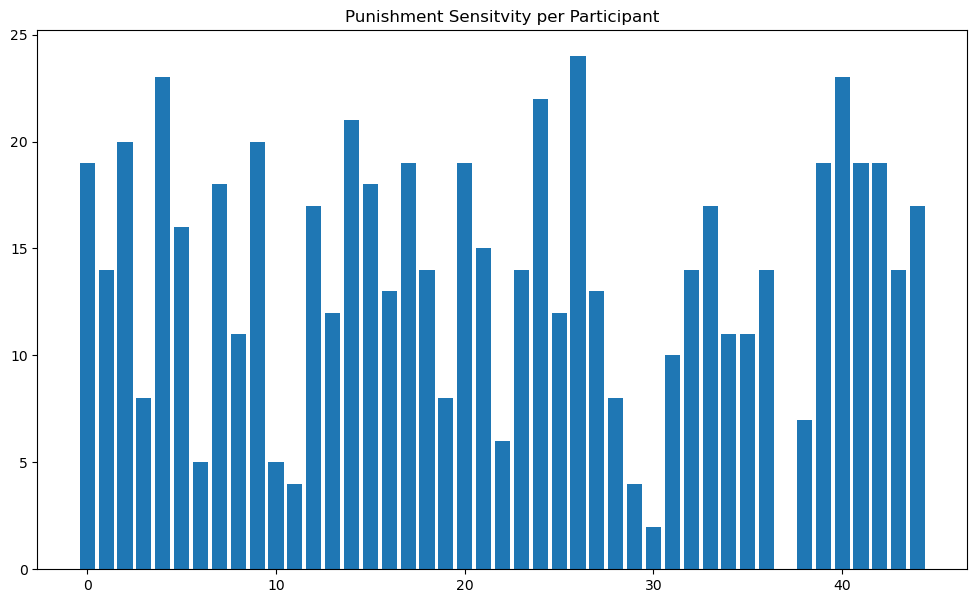

In [82]:
plt.bar(list(pr.columns), pr.loc['Punishment'])
plt.title("Punishment Sensitvity per Participant")

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Reward Sensitvity per Participant')

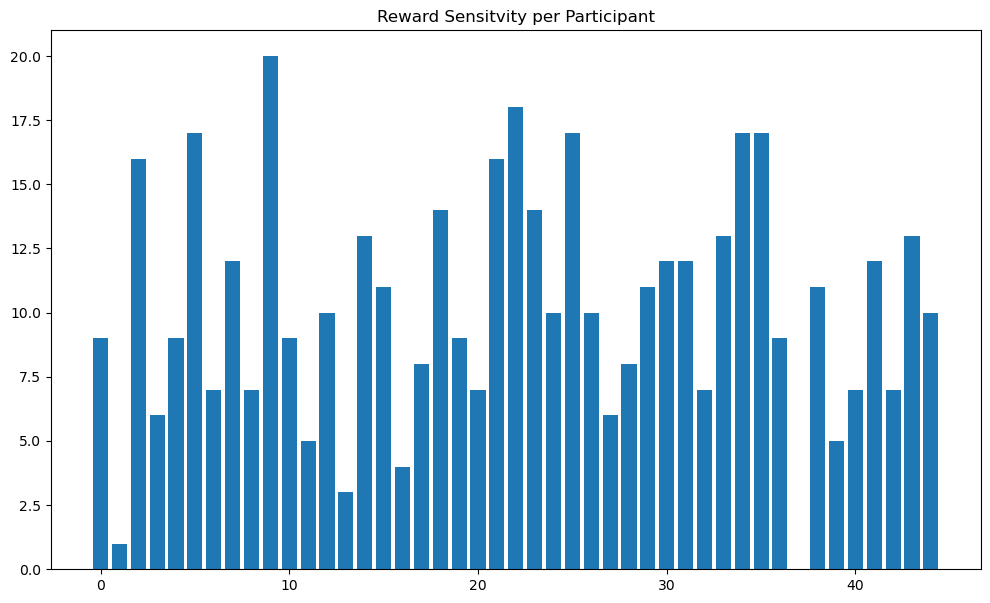

In [83]:
plt.bar(list(pr.columns), pr.loc['Reward'])
plt.title("Reward Sensitvity per Participant")

---

# PANAS

In [84]:
dfpanas = dforig.iloc[:, 144:154]
dfpanas

Upset  Hostile  Alert  Ashamed  Inspired  Nervous  Determined  Attentive  \
0     4.0      1.0    5.0      4.0       3.0      2.0         2.0        4.0   
1     2.0      2.0    3.0      4.0       2.0      4.0         3.0        4.0   
2     3.0      3.0    4.0      3.0       5.0      3.0         4.0        4.0   
3     2.0      1.0    2.0      2.0       4.0      2.0         5.0        5.0   
4     4.0      3.0    4.0      4.0       3.0      4.0         2.0        4.0   
5     3.0      3.0    4.0      3.0       4.0      3.0         3.0        4.0   
6     2.0      2.0    2.0      2.0       3.0      2.0         3.0        3.0   
7     3.0      1.0    3.0      5.0       2.0      4.0         2.0        2.0   
8     2.0      4.0    4.0      2.0       4.0      2.0         4.0        4.0   
9     4.0      4.0    5.0      3.0       3.0      4.0         4.0        4.0   
10    2.0      3.0    5.0      1.0       4.0      2.0         5.0        2.0   
11    2.0      1.0    5.0      2.0       4.0      2.0         5.0        5.0   
12    4.0      2.0    4.0      4.0       5.0      4.0         5.0        5.0   
13    2.0      2.0    3.0      1.0       5.0      3.0         4.0        5.0   
14    4.0      3.0    3.0      4.0       4.0      5.0         5.0        4.0   
15    3.0      3.0    4.0      4.0       3.0      3.0         4.0        3.0   
16    3.0      3.0    2.0      2.0       4.0      3.0         4.0        4.0   
17    4.0      2.0    5.0      4.0       3.0      5.0         3.0        4.0   
18    2.0      3.0    4.0      2.0       4.0      3.0         4.0        4.0   
19    2.0      4.0    4.0      2.0       4.0      2.0         4.0        4.0   
20    4.0      3.0    3.0      2.0       3.0      4.0         4.0        3.0   
21    2.0      3.0    3.0      3.0       4.0      4.0         4.0        4.0   
22    2.0      3.0    5.0      1.0       4.0      2.0         4.0        4.0   
23    4.0      2.0    4.0      4.0       4.0      3.0         4.0        4.0   
24    4.0      4.0    4.0      3.0       4.0      3.0         3.0        3.0   
25    4.0      2.0    3.0      4.0       4.0      4.0         5.0        3.0   
26    4.0      4.0    3.0      4.0       3.0      5.0         2.0        3.0   
27    3.0      2.0    3.0      4.0       4.0      4.0         4.0        3.0   
28    3.0      2.0    4.0      2.0       4.0      2.0         3.0        5.0   
29    3.0      1.0    4.0      2.0       4.0      4.0         4.0        4.0   
30    4.0      5.0    4.0      2.0       2.0      1.0         4.0        4.0   
31    2.0      2.0    4.0      2.0       3.0      4.0         4.0        3.0   
32    2.0      2.0    4.0      3.0       4.0      3.0         4.0        3.0   
33    4.0      2.0    3.0      2.0       4.0      5.0         4.0        3.0   
34    3.0      2.0    3.0      2.0       3.0      2.0         4.0        3.0   
35    4.0      3.0    4.0      2.0       2.0      4.0         3.0        3.0   
36    2.0      1.0    4.0      3.0       5.0      2.0         5.0        4.0   
37    NaN      NaN    NaN      NaN       NaN      NaN         NaN        NaN   
38    3.0      3.0    4.0      1.0       4.0      3.0         4.0        5.0   
39    4.0      2.0    3.0      4.0       4.0      4.0         4.0        4.0   
40    3.0      2.0    3.0      3.0       3.0      4.0         4.0        3.0   
41    2.0      1.0    3.0      4.0       3.0      4.0         5.0        3.0   
42    4.0      1.0    5.0      5.0       4.0      5.0         5.0        5.0   
43    3.0      3.0    2.0      2.0       4.0      4.0         4.0        2.0   
44    4.0      1.0    4.0      4.0       4.0      4.0         3.0        2.0   

    Afraid  Active  
0      2.0     1.0  
1      3.0     3.0  
2      3.0     4.0  
3      1.0     4.0  
4      4.0     1.0  
5      3.0     4.0  
6      2.0     4.0  
7      2.0     2.0  
8      2.0     2.0  
9      4.0     2.0  
10     2.0     5.0  
11     2.0     5.0  
12     3.0     5.0  
13     2.0     4.0  
14     4

---

# EHI-SF

In [85]:
dfehi = dforig.iloc[:, 155:159]
dfehi

Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing]  \
0                                        Always Right                                                                         
1                                        Always Right                                                                         
2                                        Always Right                                                                         
3                                        Always Right                                                                         
4                                        Always Right                                                                         
5                                       Usually Right                                                                         
6                                        Always Right                                                                         
7                                        Always Right                                                                         
8                                        Always Right                                                                         
9                                        Always Right                                                                         
10                                       Always Right                                                                         
11                                       Always Right                                                                         
12                                       Always Right                                                                         
13                                       Always Right                                                                         
14                                       Always Right                                                                         
15                                       Always Right                                                                         
16                                       Always Right                                                                         
17                                       Always Right                                                                         
18                                       Always Right                                                                         
19                                       Always Right                                                                         
20                                       Always Right                                                                         
21                                       Always Right                                                                         
22                                       Always Right                                                                         
23                                       Always Right                                                                         
24                                       Always Right                                                                         
25                                       Always Right                                                                         
26                                       Always Right                                                                         
27                                       Always Right                                                                         
28                                       Always Right                                                                         
29                                       Always Right                                                                         
30                                       Always Right             

In [86]:
dic_ehi = {"Always Right": 2,
           "Usually Right": 1,
           "Both equally": 0,
           "Usually Left": -1,
           "Always Left": -2}

dfehi.replace(dic_ehi, inplace=True)

dfehi

Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing]  \
0                                                   2                                                                          
1                                                   2                                                                          
2                                                   2                                                                          
3                                                   2                                                                          
4                                                   2                                                                          
5                                                   1                                                                          
6                                                   2                                                                          
7                                                   2                                                                          
8                                                   2                                                                          
9                                                   2                                                                          
10                                                  2                                                                          
11                                                  2                                                                          
12                                                  2                                                                          
13                                                  2                                                                          
14                                                  2                                                                          
15                                                  2                                                                          
16                                                  2                                                                          
17                                                  2                                                                          
18                                                  2                                                                          
19                                                  2                                                                          
20                                                  2                                                                          
21                                                  2                                                                          
22                                                  2                                                                          
23                                                  2                                                                          
24                                                  2                                                                          
25                                                  2                                                                          
26                                                  2                                                                          
27                                                  2                                                                          
28                                                  2                                                                          
29                                                  2                                                                          
30                                  

In [87]:
dfehi_array = np.array(dfehi)

dfehi["Total"] = 100*(sr(dfehi_array)/sr(abs(dfehi_array)))

def handedness(n):
    if n >= 100:
        return "Right handed"
    elif n >= 50 and n < 100:
        return "Mixed right handed"
    elif n < 50 and n > -50:
        return "Neutral"
    elif n <= -50 and n > -100:
        return "Mixed left handed"
    elif n <= -100:
        return "Left handed"

dfehi["Total"] = dfehi["Total"].apply(handedness)
dfehi

Please indicate your preferences in the use of hands in the following activities or when using certain objects [Writing]  \
0                                                   2                                                                          
1                                                   2                                                                          
2                                                   2                                                                          
3                                                   2                                                                          
4                                                   2                                                                          
5                                                   1                                                                          
6                                                   2                                                                          
7                                                   2                                                                          
8                                                   2                                                                          
9                                                   2                                                                          
10                                                  2                                                                          
11                                                  2                                                                          
12                                                  2                                                                          
13                                                  2                                                                          
14                                                  2                                                                          
15                                                  2                                                                          
16                                                  2                                                                          
17                                                  2                                                                          
18                                                  2                                                                          
19                                                  2                                                                          
20                                                  2                                                                          
21                                                  2                                                                          
22                                                  2                                                                          
23                                                  2                                                                          
24                                                  2                                                                          
25                                                  2                                                                          
26                                                  2                                                                          
27                                                  2                                                                          
28                                                  2                                                                          
29                                                  2                                                                          
30                                  

## Count

<Axes: xlabel='Total'>

(array([0, 1]), [Text(0, 0, 'Right handed'), Text(1, 0, 'Mixed right handed')])

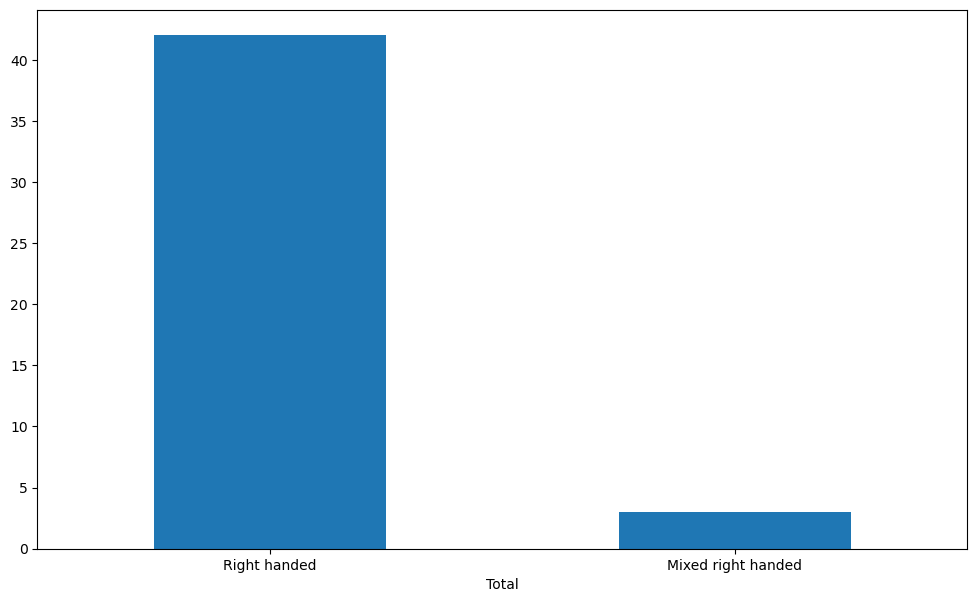

In [88]:
dfehi["Total"].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

---

# Mindfulness Experience

In [89]:
dfme = dforig.iloc[:, 159:163]
dfme

Have you ever practiced meditation, mindfulness, or contemplative prayer?  \
0                                                  No                          
1                                                 Yes                          
2                                                 Yes                          
3                                                 Yes                          
4                                                 Yes                          
5                                                 Yes                          
6                                                  No                          
7                                                 Yes                          
8                                                  No                          
9                                                  No                          
10                                                 No                          
11                                                 No                          
12                                                Yes                          
13                                                Yes                          
14                                                 No                          
15                                                 No                          
16                                                 No                          
17                                                Yes                          
18                                                 No                          
19                                                 No                          
20                                                 No                          
21                                                 No                          
22                                                 No                          
23                                                Yes                          
24                                                Yes                          
25                                                 No                          
26                                                Yes                          
27                                                Yes                          
28                                                 No                          
29                                                 No                          
30                                                Yes                          
31                                                Yes                          
32                                                Yes                          
33                                                Yes                          
34                                                Yes                          
35                                                Yes                          
36                                                 No                          
37                                                 No                          
38                                                 No                          
39                                                 No                          
40                                                Yes                          
41                                                 No                          
42                                                 No                          
43                                                Yes                          
44                                                 No                          

   If you responded 'yes' to the previous question, please briefly describe the kind of practice you engage in most frequently  \
0                                                 NaN                                                                            
1          breathing meditation, diary\ mood tracking         

In [90]:
dfc = dfme.groupby(dfme.columns[0]).size()
dfc

Have you ever practiced meditation, mindfulness, or contemplative prayer?
No     24
Yes    21
dtype: int64

<Axes: xlabel='Have you ever practiced meditation, mindfulness, or contemplative prayer?'>

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

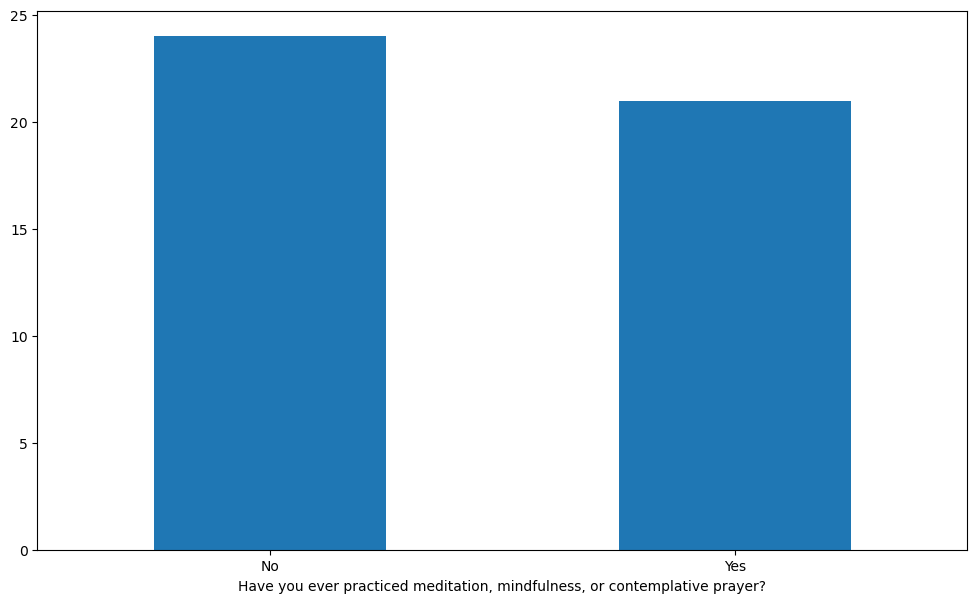

In [91]:
dfme.iloc[:, 0].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

---

# FFMQ

In [92]:
dfffmq = dforig.iloc[:, 163:202]
dfffmq

Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]  \
0                                      Sometimes True                                                                                                                                                                                              
1                                      Sometimes True                                                                                                                                                                                              
2                                      Sometimes True                                                                                                                                                                                              
3                                      Sometimes True                                                                                                                                                                                              
4                                      Sometimes True                                                                                                                                                                                              
5                                      Sometimes True                                                                                                                                                                                              
6                                      Sometimes True                                                                                                                                                                                              
7                                      Sometimes True                                                                                                                                                                                              
8                                         Rarely True                                                                                                                                                                                              
9                                         Rarely True                                                                                                                                                                                              
10                                        Rarely True                                                                                                                                                                                              
11                          Never or Very Rarely True                                                                                                                                                                                              
12                                        Rarely True                                                                                                                                                                                              
13                                     Sometimes True                                                                                                                                                                                              
14                                     Sometimes True                                                                                                                                                                                              
15                                     Sometimes True                                              

## Int and Reverse

In [93]:
mq = {'Never or Very Rarely True': 1,
      'Rarely True': 2,
      'Sometimes True': 3,
      'Often True': 4,
      'Very Often or Always True': 5}

dfffmq.replace(mq, inplace=True)

rev = [11, 15, 21, 4, 7, 12, 17, 22, 27, 33, 37, 2, 9, 13, 16, 24, 29, 34, 38]

dfffmq.iloc[:, rev] = 6 - dfffmq.iloc[:, rev]

dfffmq

Please rate each of the following statements using the scale provided.  Select the option that best describes your own opinion of what is generally true for you. [When I’m walking, I deliberately notice the sensations of my body moving.]  \
0                                                   3                                                                                                                                                                                               
1                                                   3                                                                                                                                                                                               
2                                                   3                                                                                                                                                                                               
3                                                   3                                                                                                                                                                                               
4                                                   3                                                                                                                                                                                               
5                                                   3                                                                                                                                                                                               
6                                                   3                                                                                                                                                                                               
7                                                   3                                                                                                                                                                                               
8                                                   2                                                                                                                                                                                               
9                                                   2                                                                                                                                                                                               
10                                                  2                                                                                                                                                                                               
11                                                  1                                                                                                                                                                                               
12                                                  2                                                                                                                                                                                               
13                                                  3                                                                                                                                                                                               
14                                                  3                                                                                                                                                                                               
15                                                  3                               

In [94]:
ffmq_array = np.array(dfffmq)

obv = sr(ffmq_array[:, [0, 5, 10, 14, 19, 25, 30, 35]])
des = sr(ffmq_array[:, [1, 6, 11, 15, 21, 26, 31, 36]])
awa = sr(ffmq_array[:, [4, 7, 12, 17, 22, 27, 33, 37]])
nj = sr(ffmq_array[:, [2, 9, 13, 16, 24, 29, 34, 38]])
nr = sr(ffmq_array[:, [3, 8, 18, 20, 23, 28, 32]])

stacked_total = np.stack([obv, des, awa, nj, nr], axis = 1)
ffmqtotal = pd.DataFrame(stacked_total, columns = ["Observing Total", "Describing Total", "ActAware Total", "Nonjudging Total", "Nonreactivity Total"])
ffmqtotal["FFMQ Total"] = ffmqtotal.sum(axis=1)

stacked_mean = stacked_total/[8, 8, 8, 8, 7]
ffmqmean = pd.DataFrame(stacked_mean, columns = ["Observing Mean", "Describing Mean", "ActAware Mean", "Nonjudging Mean", "Nonreactivity Mean"])
ffmqmean["FFMQ Mean"] = ffmqtotal["FFMQ Total"]/39

ffmqtotal
ffmqmean

Observing Total  Describing Total  ActAware Total  Nonjudging Total  \
0                23                25              17                19   
1                26                30              29                29   
2                30                30              27                20   
3                34                38              37                29   
4                29                 9              23                14   
5                28                22              28                29   
6                22                26              28                31   
7                29                26              18                17   
8                18                16              23                28   
9                18                19              10                16   
10               21                25              28                24   
11               13                29              36                29   
12               18                22              34                30   
13               31                24              33                36   
14               27                24              20                13   
15               30                27              28                23   
16               15                22              32                24   
17               29                22              17                11   
18               32                26              29                21   
19               28                29              25                22   
20               29                21              24                25   
21               28                19              27                17   
22               28                24              26                29   
23               29                32              26                17   
24               27                21              19                19   
25               30                27              28                15   
26               15                20              11                11   
27               22                28              23                27   
28               26                30              28                24   
29               29                29              20                18   
30               30                34              17                29   
31               28                23              17                16   
32               32                30              30                18   
33               20                28              23                15   
34               20                24              25                28   
35               30                13              26                14   
36               28                29              24                21   
37               18                25              25                21   
38               28                21              30                18   
39               25                16              25                19   
40               25                22              18                19   
41               33                11              13                16   
42               37                40              33                 9   
43               26                26              17                34   
44               22                30              26                17   

    Nonreactivity Total  FFMQ Total  
0                    15          99  
1                    24         138  
2                    19         126  
3                    26         164  
4                    20          95  
5                    20         127  
6                    17         124  
7                    24         114  
8                    24         109  
9                    16          79  
10                   28         126  
11                   18         125  
12                   19         123  
13                   

Observing Mean  Describing Mean  ActAware Mean  Nonjudging Mean  \
0            2.875            3.125          2.125            2.375   
1            3.250            3.750          3.625            3.625   
2            3.750            3.750          3.375            2.500   
3            4.250            4.750          4.625            3.625   
4            3.625            1.125          2.875            1.750   
5            3.500            2.750          3.500            3.625   
6            2.750            3.250          3.500            3.875   
7            3.625            3.250          2.250            2.125   
8            2.250            2.000          2.875            3.500   
9            2.250            2.375          1.250            2.000   
10           2.625            3.125          3.500            3.000   
11           1.625            3.625          4.500            3.625   
12           2.250            2.750          4.250            3.750   
13           3.875            3.000          4.125            4.500   
14           3.375            3.000          2.500            1.625   
15           3.750            3.375          3.500            2.875   
16           1.875            2.750          4.000            3.000   
17           3.625            2.750          2.125            1.375   
18           4.000            3.250          3.625            2.625   
19           3.500            3.625          3.125            2.750   
20           3.625            2.625          3.000            3.125   
21           3.500            2.375          3.375            2.125   
22           3.500            3.000          3.250            3.625   
23           3.625            4.000          3.250            2.125   
24           3.375            2.625          2.375            2.375   
25           3.750            3.375          3.500            1.875   
26           1.875            2.500          1.375            1.375   
27           2.750            3.500          2.875            3.375   
28           3.250            3.750          3.500            3.000   
29           3.625            3.625          2.500            2.250   
30           3.750            4.250          2.125            3.625   
31           3.500            2.875          2.125            2.000   
32           4.000            3.750          3.750            2.250   
33           2.500            3.500          2.875            1.875   
34           2.500            3.000          3.125            3.500   
35           3.750            1.625          3.250            1.750   
36           3.500            3.625          3.000            2.625   
37           2.250            3.125          3.125            2.625   
38           3.500            2.625          3.750            2.250   
39           3.125            2.000          3.125            2.375   
40           3.125            2.750          2.250            2.375   
41           4.125            1.375          1.625            2.000   
42           4.625            5.000          4.125            1.125   
43           3.250            3.250          2.125            4.250   
44           2.750            3.750          3.250            2.125   

    Nonreactivity Mean  FFMQ Mean  
0             2.142857   2.538462  
1             3.428571   3.538462  
2             2.714286   3.230769  
3             3.714286   4.205128  
4             2.857143   2.435897  
5             2.857143   3.256410  
6             2.428571   3.179487  
7             3.428571   2.923077  
8             3.428571   2.794872  
9             2.285714   2.025641  
10            4.000000   3.230769  
11            2.571429   3.205128  
12            2.714286   3.153846  
13            3.714286   3.846154  
14            3.142857   2.717949  
15            2.571429   3.230769  
16            2.857143   2.897436  
17            2.428571   2.461538  
18            3.428571   3.384615  
19            3.4

---

# STAI-T

In [95]:
dfstai = dforig.iloc[:, 202:]
dfstai

Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]  \
0                                            Somewhat                                                                                                                                                                          
1                                            Somewhat                                                                                                                                                                          
2                                       Moderately so                                                                                                                                                                          
3                                        Very much so                                                                                                                                                                          
4                                          Not at all                                                                                                                                                                          
5                                       Moderately so                                                                                                                                                                          
6                                       Moderately so                                                                                                                                                                          
7                                            Somewhat                                                                                                                                                                          
8                                            Somewhat                                                                                                                                                                          
9                                          Not at all                                                                                                                                                                          
10                                           Somewhat                                                                                                                                                                          
11                                       Very much so                                                                                                                                                                          
12                                      Moderately so                                                                                                                                                                          
13                                      Moderately so                                                                                                                                                                          
14                                      Moderately so                                                                                                                                                                          
15                                      Moderately so                                                                                                                                                                          
16                                      Moderately so                                                                                                                                              

## Int and Reverse

In [96]:
dic_t = {"Not at all": 1,
         "Somewhat": 2,
         "Moderately so": 3,
         "Very much so": 4}

dfstai.replace(dic_t, inplace = True)
rev = np.array([1, 3, 6, 7, 10, 13, 14, 16, 19])-1
dfstai.iloc[:, rev] = 5 - dfstai.iloc[:, rev]

dfstai["STAI Total"] = dfstai.sum(axis=1)
dfstai

Please read the following statements and select the item to indicate how you generally feel most of the time. There’s no right or wrong answers and please don’t spend too much time on each statement [I feel pleasant.]  \
0                                                   3                                                                                                                                                                           
1                                                   3                                                                                                                                                                           
2                                                   2                                                                                                                                                                           
3                                                   1                                                                                                                                                                           
4                                                   4                                                                                                                                                                           
5                                                   2                                                                                                                                                                           
6                                                   2                                                                                                                                                                           
7                                                   3                                                                                                                                                                           
8                                                   3                                                                                                                                                                           
9                                                   4                                                                                                                                                                           
10                                                  3                                                                                                                                                                           
11                                                  1                                                                                                                                                                           
12                                                  2                                                                                                                                                                           
13                                                  2                                                                                                                                                                           
14                                                  2                                                                                                                                                                           
15                                                  2                                                                                                                                                                           
16                                                  2                                                                                                                              

## Descriptives

<BarContainer object of 45 artists>

Text(0.5, 1.0, 'Total Score per Participant')

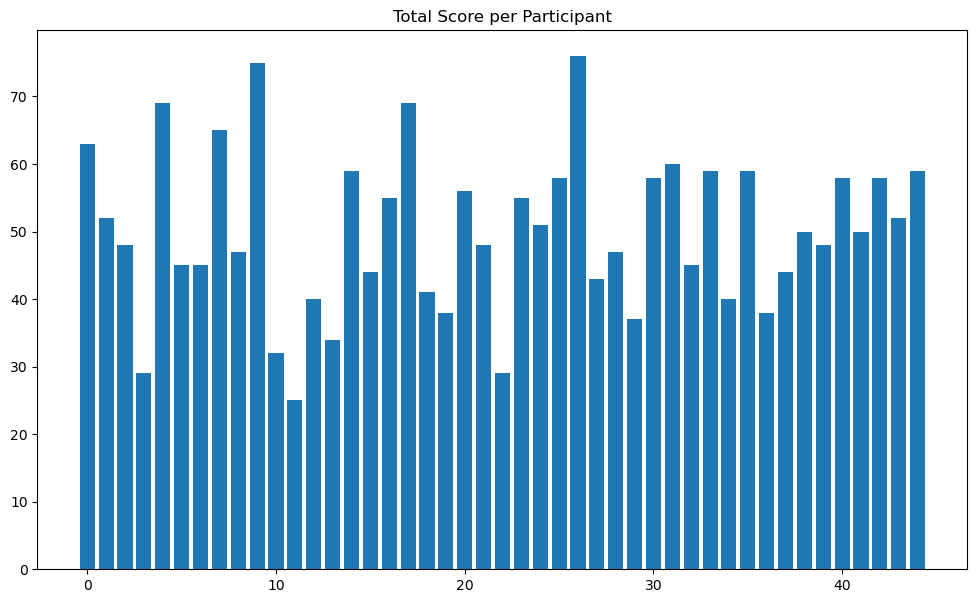

In [97]:
plt.bar(dfstai.index, dfstai["STAI Total"])
plt.title("Total Score per Participant")

---

# Making file for analysis

In [98]:
frames = [dforig.iloc[:, 1:5], dfme, dfffmq,  ffmqtotal, ffmqmean, dfstai]

mind = pd.concat(frames, axis=1)

mind

Please enter your participant number When is your date of birth?  \
0                                   9001                  29/05/2000   
1                                   9002                  29/09/2001   
2                                   9003                  28/10/2000   
3                                   9004                  27/10/2000   
4                                   9005                  28/05/2001   
5                                   9006                  18/03/2003   
6                                   9007                  24/04/2003   
7                                   9008                  19/09/2001   
8                                   9009                  22/06/2002   
9                                   9011                  21/03/2001   
10                                  9012                  17/09/2003   
11                                  9013                  09/05/2000   
12                                  9014                  20/05/2003   
13                                  9015                  23/10/2000   
14                                  9016                  07/01/2003   
15                                  9017                  18/04/2003   
16                                  9018                  19/07/2003   
17                                  9019                  25/01/2000   
18                                  9020                  21/08/2003   
19                                  9021                  09/01/2003   
20                                  9022                  16/05/2003   
21                                  9023                  13/10/2004   
22                                  9024                  28/09/2003   
23                                  9026                  20/08/2004   
24                                  9027                  07/04/2005   
25                                  9028                  05/06/2001   
26                                  9029                  12/11/2003   
27                                  9030                  22/11/2000   
28                                  9031                  17/04/1999   
29                                  9032                  21/09/2002   
30                                  9033                  06/07/2002   
31                                  9034                  19/09/2002   
32                                  9036                  27/07/2001   
33                                  9037                  27/11/2000   
34                                  9038                  10/11/2000   
35                                  9039                  04/10/2003   
36                                  9040                  06/06/2002   
37                                  9041                  16/07/1998   
38                                  9050                  11/07/1998   
39                                  9051                  26/01/2000   
40                                  9052                  19/10/2000   
41                                  9053                  28/04/2002   
42                                  9054                  30/11/2003   
43                                  9055                  26/02/2003   
44                                  9056                  07/10/2004   

   Which sex were you assigned at birth? What is your gender?  \
0                                   Male                 Male   
1                                   Male                 Male   
2                                 Female               Female   
3                                   Male                 Male   
4                                 Female               Female   
5                                 Female               Female   
6                                 Female               Female   
7                                 Female               Female   
8                                 Female               Female   
9                                   Male 

---

# Behavioural Data

In [99]:
os.chdir('/home/pavgreen/Documents/LRGS/EEG/alt/study')

def calc(df, ind, participant):
    bhv = pd.read_csv(f"{participant}/eventnew.csv")
    
    Go = len(bhv[(bhv.type == 1) | (bhv.type == 3) | (bhv.type == 5)]) 
    CGo = len(bhv[bhv.type == 3])
    IGo = len(bhv[(bhv.type == 1) | (bhv.type == 5)])
    df.loc[ind, "Go Correct"] = (CGo/Go)*100

    nGo = len(bhv[(bhv.type == 2) | (bhv.type == 4)])          
    CnGo = len(bhv[bhv.type == 2])
    InGo = len(bhv[bhv.type == 4])
    df.loc[ind, "noGo Correct"] = (CnGo/nGo)*100

    df.loc[ind, "delta Go"] = ((CGo-CnGo)/(Go+nGo))*100
    
    #df.loc[ind, "Go Ratio"] = ((CGo/nGo)/(CnGo/Go))*100
    #df.loc[ind, "noGo Ratio"] = ((CnGo/nGo)/(CGo/Go))*100

for i, participant in enumerate(mind.iloc[:, 0], 0):
    calc(mind, i, participant)

In [100]:
def calchalf1(df, ind, participant):
    bhv = pd.read_csv(f"{participant}/eventnew.csv")
    con = pd.read_csv(f"{participant}/throw.csv")

    h = np.where(bhv.iloc[:, 3] == 9)
    h = np.take(h, 0)
    bhv = bhv.iloc[:h, :]

    t = con.iloc[:, 0] < h
    con = con[t]

    gtf = sum(con.iloc[:, 1] == 1)
    ngtf = sum(con.iloc[:, 1] == 2)

    Go = len(bhv[(bhv.type == 1) | (bhv.type == 3) | (bhv.type == 5)])
    CGo = len(bhv[bhv.type == 3])
    IGo = len(bhv[(bhv.type == 1) | (bhv.type == 5)])
    df.loc[ind, "Go Correct 1"] = (CGo/Go)*100

    nGo = len(bhv[(bhv.type == 2) | (bhv.type == 4)])         
    CnGo = len(bhv[bhv.type == 2])
    InGo = len(bhv[bhv.type == 4])
    df.loc[ind, "noGo Correct 1"] = (CnGo/nGo)*100
    
    #df.loc[ind, "Go Ratio 1"] = ((CGo/nGo)/(CnGo/Go))*100
    #df.loc[ind, "noGo Ratio 1"] = ((CnGo/nGo)/(CGo/Go))*100

for i, participant in enumerate(mind.iloc[:, 0], 0):
    calchalf1(mind, i, participant)

In [101]:
def calchalf2(df, ind, participant):
    bhv = pd.read_csv(f"{participant}/eventnew.csv")
    con = pd.read_csv(f"{participant}/throw.csv")

    h = np.where(bhv.iloc[:, 3] == 9)
    h = np.take(h, 0)
    bhv = bhv.iloc[h:, :]

    t = con.iloc[:, 0] > h
    con = con[t]

    gtf = sum(con.iloc[:, 1] == 1)
    ngtf = sum(con.iloc[:, 1] == 2)
    
    Go = len(bhv[(bhv.type == 1) | (bhv.type == 3) | (bhv.type == 5)])
    CGo = len(bhv[bhv.type == 3])
    IGo = len(bhv[(bhv.type == 1) | (bhv.type == 5)])
    df.loc[ind, "Go Correct 2"] = (CGo/Go)*100

    nGo = len(bhv[(bhv.type == 2) | (bhv.type == 4)])           
    CnGo = len(bhv[bhv.type == 2])
    InGo = len(bhv[bhv.type == 4])
    df.loc[ind, "noGo Correct 2"] = (CnGo/nGo)*100
    
    #df.loc[ind, "Go Ratio 2"] = ((CGo/nGo)/(CnGo/Go))*100
    #df.loc[ind, "noGo Ratio 2"] = ((CnGo/nGo)/(CGo/Go))*100

for i, participant in enumerate(mind.iloc[:, 0], 0):
    calchalf2(mind, i, participant)

In [102]:
def calchalf3(df, ind, participant):
    min_epoch = pd.read_csv(f"{participant}/{participant}.csv")
    min_epoch = min_epoch.loc[:, "fixation_cross.started"]
    min_epoch = min_epoch.dropna()

    differences = []
    
    for i in range(1, len(min_epoch)-1):
        diff = min_epoch[i+1] - min_epoch[i]
        differences.append(diff)
        
    df.loc[ind, "min"] = min(differences)

for ind, participant in enumerate(mind.iloc[:, 0], 0):
    calchalf3(mind, ind, participant)

In [103]:
mind.to_csv('mind.csv', index=False)

In [104]:
mind

Please enter your participant number When is your date of birth?  \
0                                   9001                  29/05/2000   
1                                   9002                  29/09/2001   
2                                   9003                  28/10/2000   
3                                   9004                  27/10/2000   
4                                   9005                  28/05/2001   
5                                   9006                  18/03/2003   
6                                   9007                  24/04/2003   
7                                   9008                  19/09/2001   
8                                   9009                  22/06/2002   
9                                   9011                  21/03/2001   
10                                  9012                  17/09/2003   
11                                  9013                  09/05/2000   
12                                  9014                  20/05/2003   
13                                  9015                  23/10/2000   
14                                  9016                  07/01/2003   
15                                  9017                  18/04/2003   
16                                  9018                  19/07/2003   
17                                  9019                  25/01/2000   
18                                  9020                  21/08/2003   
19                                  9021                  09/01/2003   
20                                  9022                  16/05/2003   
21                                  9023                  13/10/2004   
22                                  9024                  28/09/2003   
23                                  9026                  20/08/2004   
24                                  9027                  07/04/2005   
25                                  9028                  05/06/2001   
26                                  9029                  12/11/2003   
27                                  9030                  22/11/2000   
28                                  9031                  17/04/1999   
29                                  9032                  21/09/2002   
30                                  9033                  06/07/2002   
31                                  9034                  19/09/2002   
32                                  9036                  27/07/2001   
33                                  9037                  27/11/2000   
34                                  9038                  10/11/2000   
35                                  9039                  04/10/2003   
36                                  9040                  06/06/2002   
37                                  9041                  16/07/1998   
38                                  9050                  11/07/1998   
39                                  9051                  26/01/2000   
40                                  9052                  19/10/2000   
41                                  9053                  28/04/2002   
42                                  9054                  30/11/2003   
43                                  9055                  26/02/2003   
44                                  9056                  07/10/2004   

   Which sex were you assigned at birth? What is your gender?  \
0                                   Male                 Male   
1                                   Male                 Male   
2                                 Female               Female   
3                                   Male                 Male   
4                                 Female               Female   
5                                 Female               Female   
6                                 Female               Female   
7                                 Female               Female   
8                                 Female               Female   
9                                   Male 

In [105]:
min(mind.iloc[:, -1])

1.5167048014700413